In [1]:
# Render our plots inline
%matplotlib inline

# warnings: Provides a way to suppress or manage specific warning messages.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# pandas: Provides data structures and data analysis tools.
import pandas as pd

# numpy: Provides support for working with arrays and mathematical functions on arrays.
import numpy as np

# seaborn: Data visualization library based on matplotlib. 
import seaborn as sns

# matplotlib: A plotting library to produce visualizations.
import matplotlib.pyplot as plt

# StandardScaler: A utility from scikit-learn to standardize features.
from sklearn.preprocessing import StandardScaler

# train_test_split: Utility function from scikit-learn to split datasets.
# GridSearchCV: Utility function from scikit-learn for hyperparameter tuning.
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score

# Various scikit-learn models
from sklearn.linear_model import LinearRegression, SGDClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# xgboost: An optimized gradient boosting library.
import xgboost as xgb
from xgboost import XGBClassifier

# confusion_matrix: A utility function from scikit-learn to create a confusion matrix.
# accuracy_score: A utility function from scikit-learn to calculate accuracy.
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, classification_report

# category_encoders: Provides various encoding schemes to handle categorical variables.
import category_encoders as ce

# Enhance the appearance of plots
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['figure.dpi'] = (108)

In [2]:
df = pd.read_csv('combined_county_datasets_NEW.csv')

In [3]:
# Show all columns and their data types without truncation
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.dtypes)


County_State                                                   object
Population                                                      int64
Whitepop                                                        int64
Asianpop                                                        int64
two_or_more_pop                                                 int64
Otherpop                                                        int64
NativePacificIslanderpop                                        int64
AmericanIndianAlaskanpop                                        int64
African_American_Blackpop                                       int64
MedianIncomeHouseholds                                          int64
MedianIncomeFamilies                                            int64
MedianIncomeMarried                                             int64
MedianIncomeNonFamily                                           int64
percentSnap                                                   float64
percentNOSnap       

In [4]:
# Get columns with null values
columns_with_nulls = df.columns[df.isnull().any()]
print(columns_with_nulls) # Visualize 

Index(['lapop10', 'lapop10share', 'lalowi10', 'lalowi10share', 'lakids10',
       'lakids10share', 'laseniors10', 'laseniors10share', 'lawhite10',
       'lawhite10share', 'lablack10', 'lablack10share', 'laasian10',
       'laasian10share', 'lanhopi10', 'lanhopi10share', 'laaian10',
       'laaian10share', 'laomultir10', 'laomultir10share', 'lahisp10',
       'lahisp10share', 'lahunv10', 'lahunv10share', 'lasnap10',
       'lasnap10share'],
      dtype='object')


In [5]:
df.shape

(41, 155)

In [6]:
# Check for null values in each column of the DataFrame and filter columns with nulls
null_counts = df.isnull().sum()
columns_with_nulls = null_counts[null_counts > 0]

# Display the names of columns that have null values and their respective count
print(columns_with_nulls)

lapop10             18
lapop10share        18
lalowi10            18
lalowi10share       18
lakids10            18
lakids10share       18
laseniors10         18
laseniors10share    18
lawhite10           18
lawhite10share      18
lablack10           18
lablack10share      18
laasian10           18
laasian10share      18
lanhopi10           18
lanhopi10share      18
laaian10            18
laaian10share       18
laomultir10         18
laomultir10share    18
lahisp10            18
lahisp10share       18
lahunv10            18
lahunv10share       18
lasnap10            18
lasnap10share       18
dtype: int64


In [7]:
# Assuming df is your original DataFrame
df = df.drop(columns=columns_with_nulls.index)

# Now df_cleaned is your DataFrame with the columns having null values dropped

MedianIncomeHouseholds         -0.877323
MedianIncomeFamilies           -0.802482
MedianIncomeNonFamily          -0.788143
MedianIncomeMarried            -0.783239
Whitepop                       -0.483706
Asianpop                       -0.442491
Otherpop                       -0.357844
African_American_Blackpop      -0.351853
two_or_more_pop                -0.329703
NumberSnap                     -0.119804
NativePacificIslanderpop        0.054534
AmericanIndianAlaskanpop        0.419590
Overall_Food_Insecurity_Rate    1.000000
Name: Overall_Food_Insecurity_Rate, dtype: float64

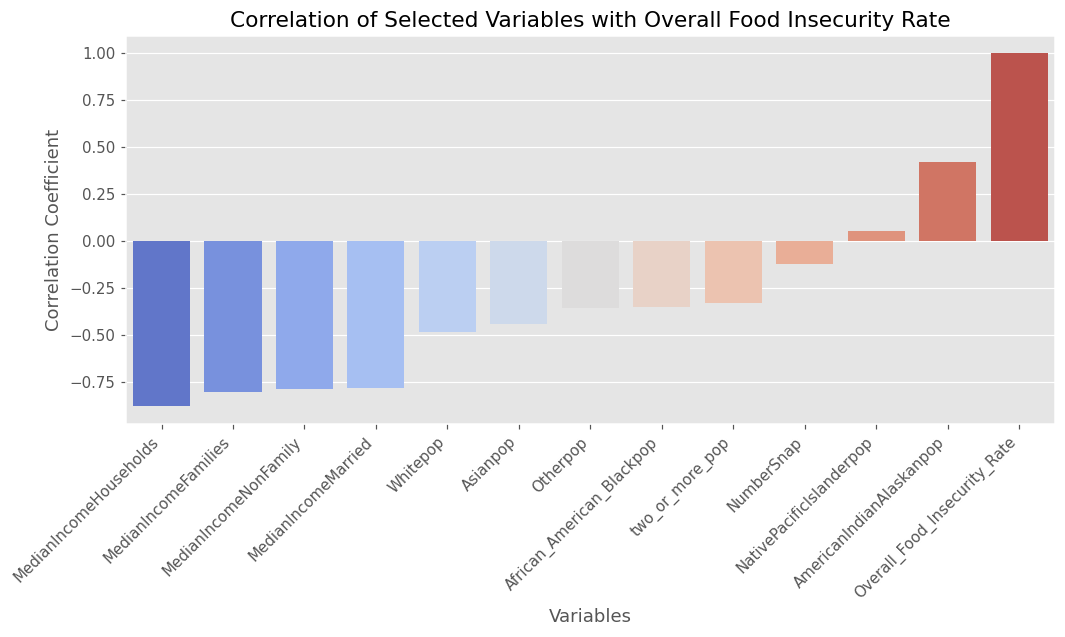

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation coefficients for selected variables with the overall food insecurity rate
selected_variables = [
    'MedianIncomeHouseholds',
    'MedianIncomeFamilies',
    'MedianIncomeMarried',
    'MedianIncomeNonFamily',
    'NumberSnap',
    'Whitepop',
    'Asianpop',
    'two_or_more_pop',
    'Otherpop',
    'NativePacificIslanderpop',
    'AmericanIndianAlaskanpop',
    'African_American_Blackpop',
    'Overall_Food_Insecurity_Rate'
]
correlation_matrix = df[selected_variables].corr()

# Focus on the correlation of variables with the Overall Food Insecurity Rate
correlation_with_fi = correlation_matrix['Overall_Food_Insecurity_Rate'].sort_values()

# Plotting the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_fi.index, y=correlation_with_fi.values, palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title('Correlation of Selected Variables with Overall Food Insecurity Rate')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Variables')
plt.tight_layout()

correlation_with_fi

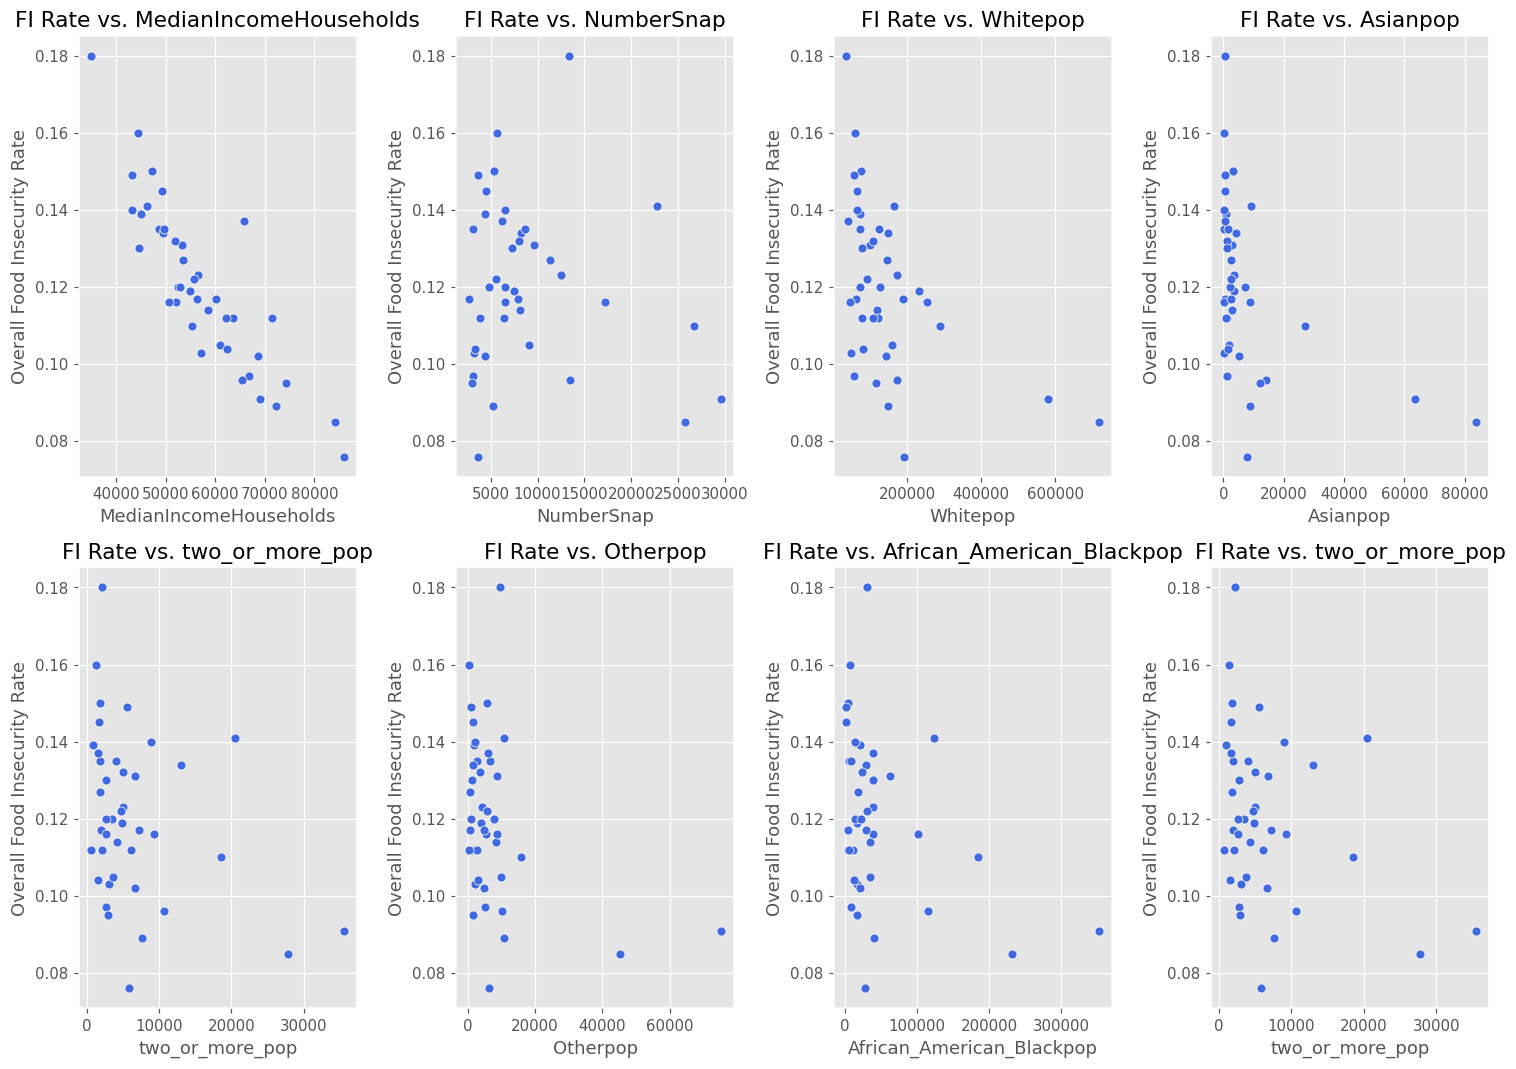

In [9]:
fig, axs = plt.subplots(2, 4, figsize=(14, 10))

# Scatter plots to visualize the relationship of selected variables with food insecurity rate
variables_to_plot = [
    'MedianIncomeHouseholds',
    'NumberSnap',
    'Whitepop',
    'Asianpop',
    'two_or_more_pop',
    'Otherpop',
    'African_American_Blackpop',
    'two_or_more_pop'
    
]
for ax, variable in zip(axs.flat, variables_to_plot):
    sns.scatterplot(data=df, x=variable, y='Overall_Food_Insecurity_Rate', ax=ax, color='royalblue')
    ax.set_title(f'FI Rate vs. {variable}')
    ax.set_xlabel(variable)
    ax.set_ylabel('Overall Food Insecurity Rate')

plt.tight_layout()
plt.show()

In [10]:
#import matplotlib.pyplot as plt
#import seaborn as sns

# Set the aesthetic style of the plots
#sns.set(style="whitegrid")

# List of continuous and categorical features
#continuous_features = ['eduattain_male_pop_18_24', 'eduattain_male_pop_18_24_less_high', 
#                       'eduattain_male_pop_18_24_high', 'eduattain_male_pop_18_24_some_college', 'eduattain_male_pop_18_24_bachelors_or_higher']

# Plotting continuous features
#for feature in continuous_features:
#    plt.figure(figsize=(10, 6))
#    sns.histplot(df[feature], kde=True)
#    plt.title(f'Distribution of {feature}')
#    plt.xlabel(feature)
#    plt.ylabel('Frequency')
#    plt.show()

In [11]:
# Sort the original data by the 'Overall Food Insecurity Rate' in descending order
sorted_original_data = df.sort_values('Overall_Food_Insecurity_Rate', ascending=False)

# Select the top counties with the highest FI rates - let's use top 10 as an example
top_counties_original = sorted_original_data[['County_State', 'Overall_Food_Insecurity_Rate']].head(10)

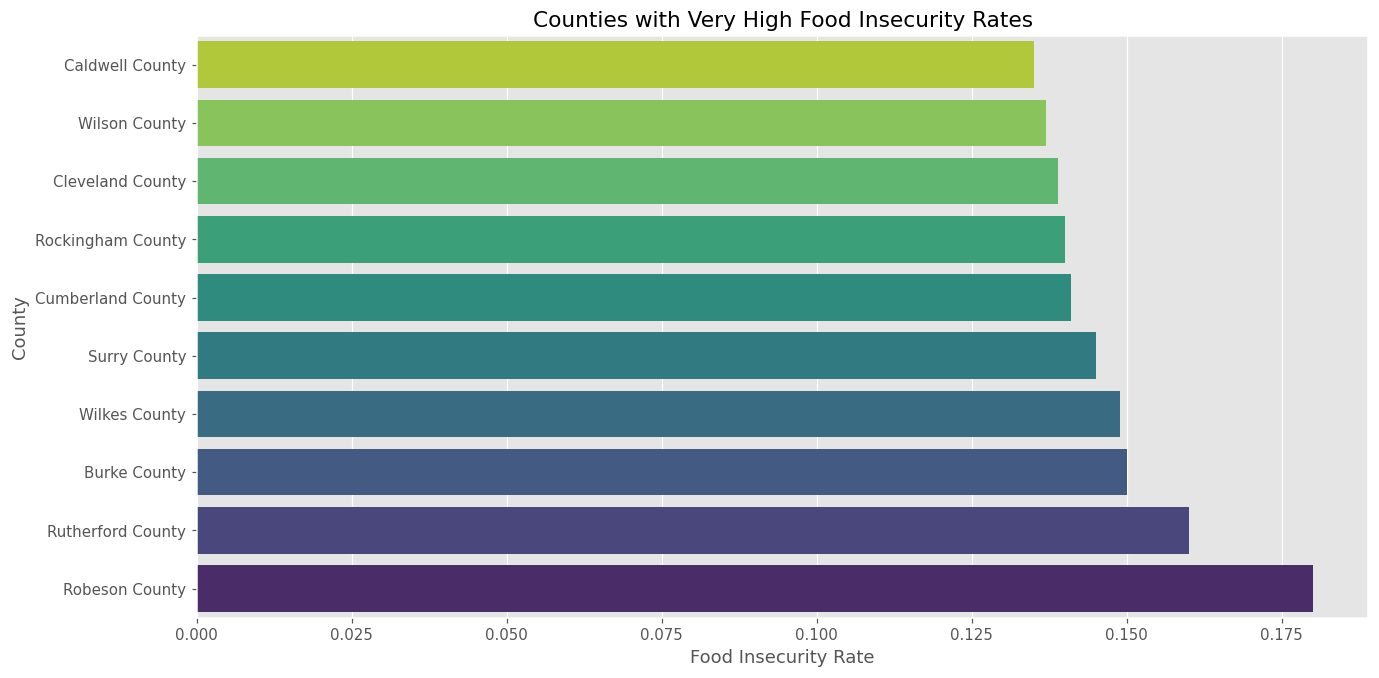

In [12]:
# Removing the "North Carolina" part from the 'County_State' entries for cleaner y-axis labels
top_counties_original['County'] = top_counties_original['County_State'].str.replace(', North Carolina', '')

# Plot the horizontal bar chart with modified county names
plt.figure(figsize=(14, 7))
sns.barplot(
    x=top_counties_original['Overall_Food_Insecurity_Rate'],
    y=top_counties_original['County'],
    palette="viridis",
    orient='h'
)
plt.title('Counties with Very High Food Insecurity Rates')
plt.xlabel('Food Insecurity Rate')
plt.ylabel('County')
plt.gca().invert_yaxis()  # To have the highest FI rate at the top of the chart
plt.show()


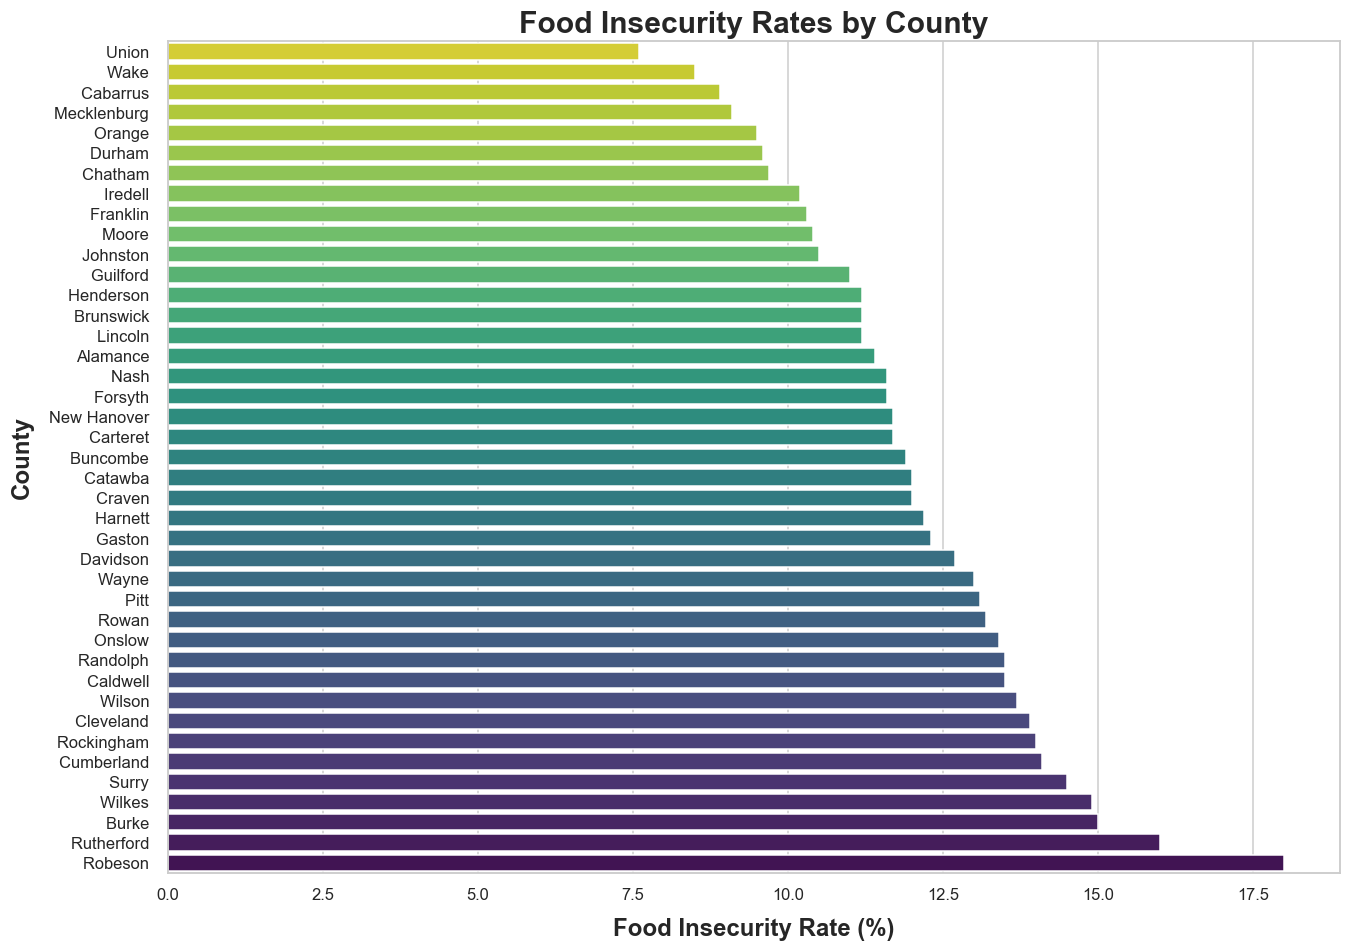

In [144]:
# Removing the "North Carolina" part from the 'County_State' entries for all rows
df['County'] = df['County_State'].str.replace('County, North Carolina', '')

# Sort the dataframe by the 'Overall Food Insecurity Rate' in descending order for all counties
all_counties_sorted = df.sort_values('Overall_Food_Insecurity_Rate', ascending=False)

# Adjust size of figure
plt.figure(figsize=(14, 10))

# Plot the horizontal bar chart with all county names
sns.barplot(
    x=all_counties_sorted['Overall_Food_Insecurity_Rate'] * 100,
    y=all_counties_sorted['County'],
    palette="viridis",
    orient='h'
)
plt.title('Food Insecurity Rates by County', fontsize=20, fontweight='bold')
plt.xlabel('Food Insecurity Rate (%)', fontsize=16, fontweight='bold', labelpad=10)
plt.ylabel('County', fontsize=16, fontweight='bold', labelpad=10)
plt.gca().invert_yaxis()  # To have the highest FI rate at the top of the chart
plt.show()


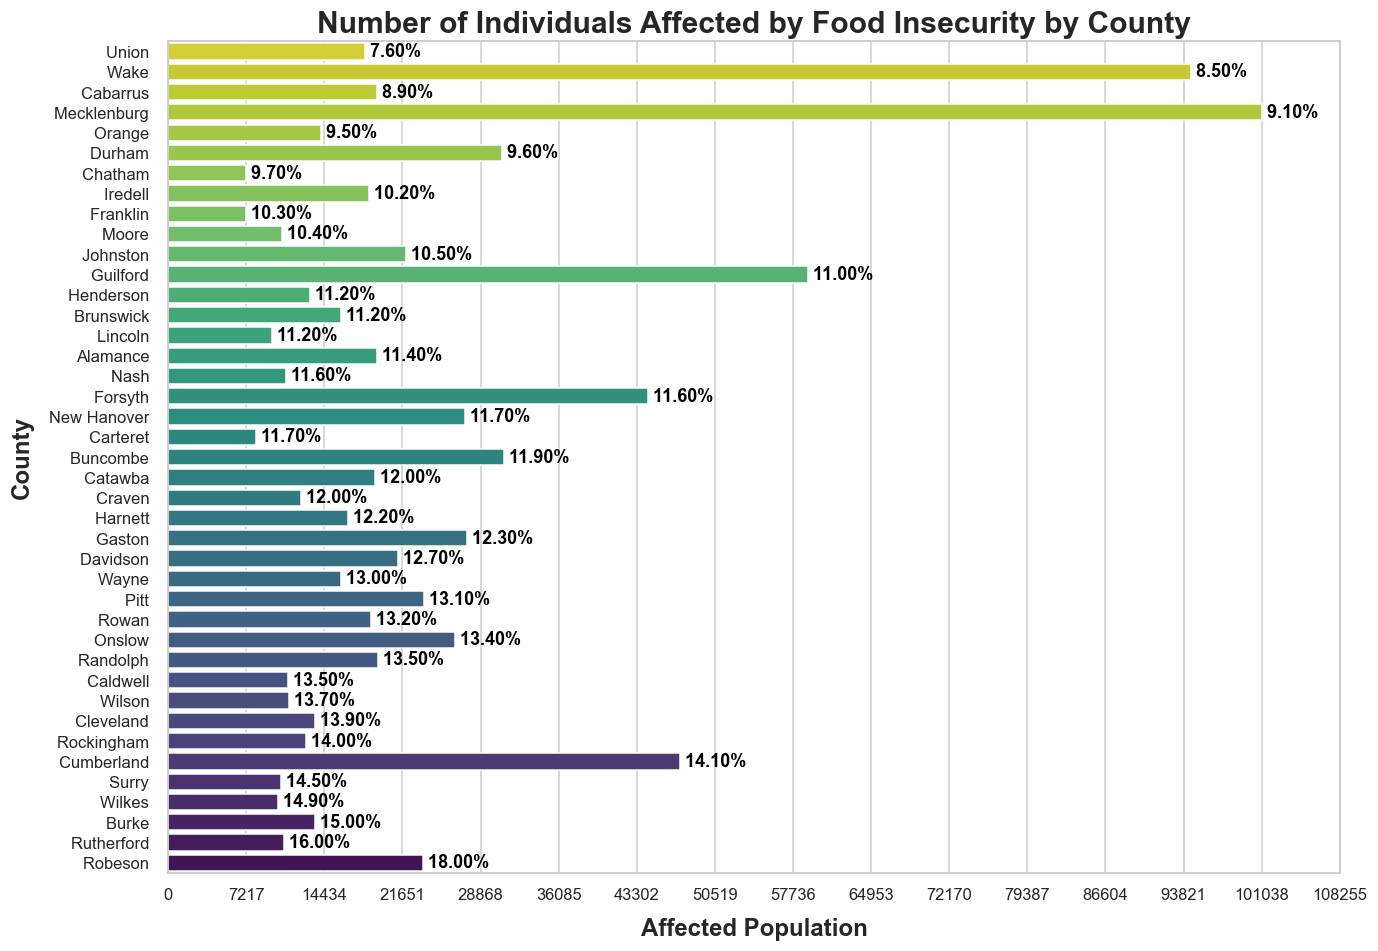

In [143]:
# Removing the "North Carolina" part from the 'County_State' entries for all rows
df['County'] = df['County_State'].str.replace('County, North Carolina', '')

# Normalize the affected population to per 100,000 people
df['Affected_Pop'] = df['Overall_Food_Insecurity_Rate'] * df['Population']

# Sort the dataframe by the 'Affected Population Per 100k' in descending order for all counties
all_counties_sorted = df.sort_values('Overall_Food_Insecurity_Rate', ascending=False)

# Plot the horizontal bar chart with all county names
plt.figure(figsize=(14, 10))
bar_plot = sns.barplot(
    x=all_counties_sorted['Affected_Pop'],
    y=all_counties_sorted['County'],
    palette="viridis",
    label='Affected Population Per 100k',
    orient='h'
)

# Annotate each bar with the corresponding FI rate percentage
for index, value in enumerate(all_counties_sorted['Overall_Food_Insecurity_Rate']):
    plt.text(
        all_counties_sorted['Affected_Pop'].iloc[index],  # x position, end of the bar
        index,  # y position, align with each bar
        ' {:.2f}%'.format(value * 100),  # the text to display (formatted as a percentage)
        va='center',  # vertical alignment
        ha='left',  # horizontal alignment
        color='black',  # text color
        fontweight='bold'  # text weight
    )

# Set x-axis ticks at appropriate increments based on the data range
max_rate = all_counties_sorted['Affected_Pop'].max()
tick_step = max_rate / 14  
plt.xticks(range(0, int(max_rate) + int(tick_step), int(tick_step)))

# Titles & Axis Labels
plt.title('Number of Individuals Affected by Food Insecurity by County', fontsize=20, fontweight='bold')
plt.xlabel('Affected Population', fontsize=16, fontweight='bold', labelpad=10)
plt.ylabel('County', fontsize=16, fontweight='bold', labelpad=10)
plt.gca().invert_yaxis()  # To have the highest FI rate at the top of the chart
plt.show()

In [ ]:
# Identifying columns related to Educational Attainment with the prefix "eduattain_"
education_columns = [col for col in df.columns if col.startswith("eduattain_")]

education_columns


['eduattain_male_pop_18_24',
 'eduattain_male_pop_18_24_less_high',
 'eduattain_male_pop_18_24_high',
 'eduattain_male_pop_18_24_some_college',
 'eduattain_male_pop_18_24_bachelors_or_higher',
 'eduattain_male_pop_25_34',
 'eduattain_male_pop_25_34_high_or_higher',
 'eduattain_male_pop_25_34_bachelors_or_higher',
 'eduattain_male_pop_35_44',
 'eduattain_male_pop_35_44_high_or_higher',
 'eduattain_male_pop_35_44_bachlors_or_higher',
 'eduattain_male_pop_45_64',
 'eduattain_male_pop_45_64_high_or_higher',
 'eduattain_male_pop_45_64_bachelors_or_higher',
 'eduattain_male_pop_65_plus',
 'eduattain_male_pop_65_plus_high_or_higher',
 'eduattain_male_pop_65_plus_bachelors_or_higher',
 'eduattain_female_18_24',
 'eduattain_female_18_24_less_high',
 'eduattain_female_18_24_high',
 'eduattain_female_18_24_some_college',
 'eduattain_female_18_24_bachelors_higher',
 'eduattain_female_25_34',
 'eduattain_female_25_34_high_or_higher',
 'eduattain_female_25_34_bachelors_or_higher',
 'eduattain_female

In [15]:
# Identifying columns related to Food Insecurity and Educational Attainment
food_insecurity_columns = [col for col in df.columns if "Food Insecurity" in col]
education_columns = [col for col in df.columns if "Education" in col]

(food_insecurity_columns, education_columns)


(['Food Insecurity Rate among Black Persons (all ethnicities)',
  'Food Insecurity Rate among Hispanic Persons (any race)',
  'Food Insecurity Rate among White, non-Hispanic Persons '],
 [])

In [16]:
# Since we don't have a single "Food Insecurity Rate" for all, let's use one for a broad demographic as a proxy
# For this example, let's use "Food Insecurity Rate among White, non-Hispanic Persons" as a representative,
# assuming it could have a wide coverage across the counties. This decision is for demonstration and might not
# reflect the best analytical approach without further context.
food_insecurity_column = 'Overall_Food_Insecurity_Rate'

# Calculating a combined measure for educational attainment (population 25 and older with bachelor's or higher)
# Combining both male and female populations
edu_bachelors_25_plus = df[['eduattain_male_pop_25_34_bachelors_or_higher',
                              'eduattain_male_pop_35_44_bachlors_or_higher', # Note the spelling discrepancy
                              'eduattain_male_pop_45_64_bachelors_or_higher',
                              'eduattain_male_pop_65_plus_bachelors_or_higher',
                              'eduattain_female_25_34_bachelors_or_higher',
                              'eduattain_female_35_44_bachelors_or_higher',
                              'eduattain_female_45_64_bachelors_or_higher',
                              'eduattain_female_65_over_bachelors_or_higher']].sum(axis=1)

population_25_plus = df[['eduattain_male_pop_25_34',
                           'eduattain_male_pop_35_44',
                           'eduattain_male_pop_45_64',
                           'eduattain_male_pop_65_plus',
                           'eduattain_female_25_34',
                           'eduattain_female_35_44',
                           'eduattain_female_45_64',
                           'eduattain_female_65_over']].sum(axis=1)

df['Percentage_25_plus_Bachelors_or_Higher'] = edu_bachelors_25_plus / population_25_plus

# Now, let's calculate the correlation
correlation = df[['Percentage_25_plus_Bachelors_or_Higher', food_insecurity_column]].corr().iloc[0, 1]

correlation



-0.7329999573661244

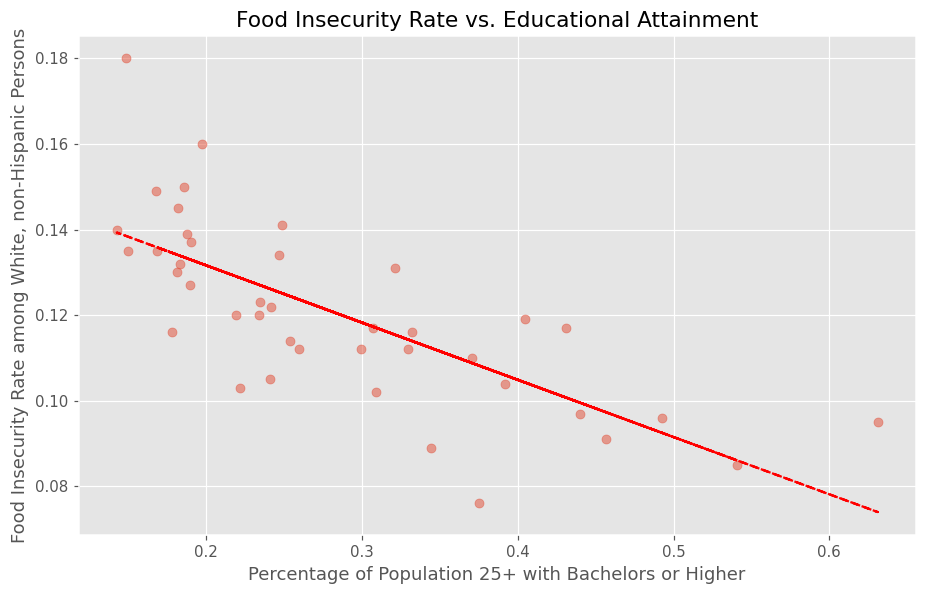

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Percentage_25_plus_Bachelors_or_Higher'], df[food_insecurity_column], alpha=0.5)

# Adding a trend line
z = np.polyfit(df['Percentage_25_plus_Bachelors_or_Higher'], df[food_insecurity_column], 1)
p = np.poly1d(z)
plt.plot(df['Percentage_25_plus_Bachelors_or_Higher'], p(df['Percentage_25_plus_Bachelors_or_Higher']), "r--")

# Labels and title
plt.title('Food Insecurity Rate vs. Educational Attainment')
plt.xlabel('Percentage of Population 25+ with Bachelors or Higher')
plt.ylabel('Food Insecurity Rate among White, non-Hispanic Persons')
plt.grid(True)

plt.show()


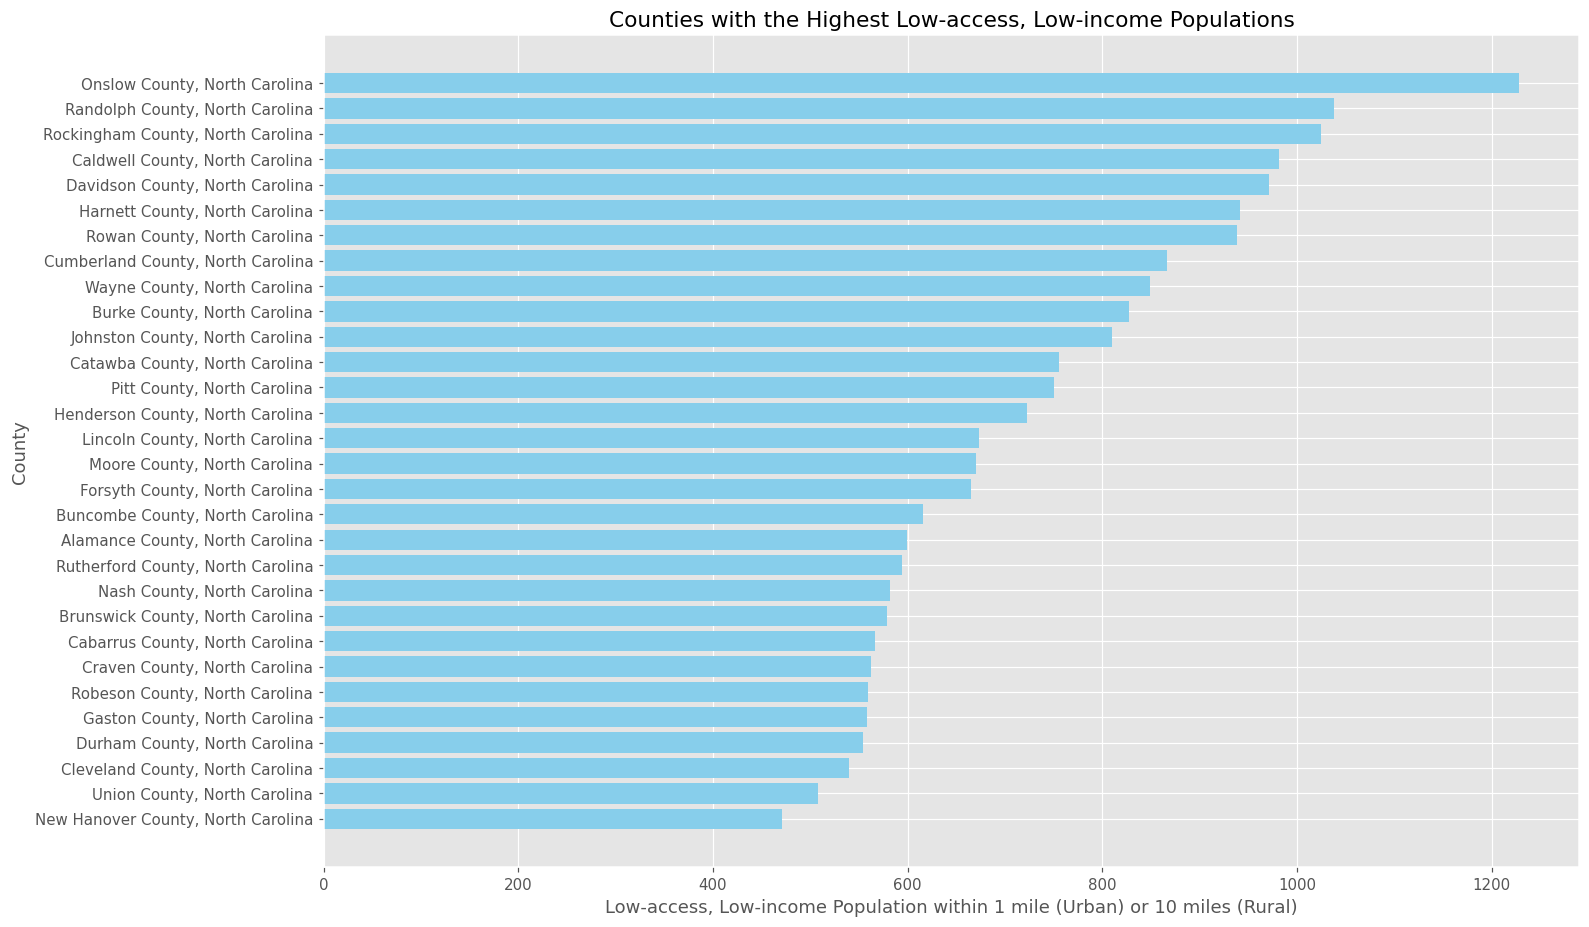

In [18]:
# First, let's extract the relevant column for LALOWI1_10 along with the county names
lalowi_data = df[['County_State', 'LALOWI1_10']].copy()

# Sort the counties by the LALOWI1_10 value
lalowi_data_sorted = lalowi_data.sort_values('LALOWI1_10', ascending=False)

# Now let's create a bar chart
plt.figure(figsize=(15, 10))

# Because there may be many counties, we'll plot just the top 30 for readability
plt.barh(lalowi_data_sorted['County_State'][:30], lalowi_data_sorted['LALOWI1_10'][:30], color='skyblue')

plt.xlabel('Low-access, Low-income Population within 1 mile (Urban) or 10 miles (Rural)')
plt.ylabel('County')
plt.title('Counties with the Highest Low-access, Low-income Populations')
plt.gca().invert_yaxis()  # To display the highest value at the top
plt.show()


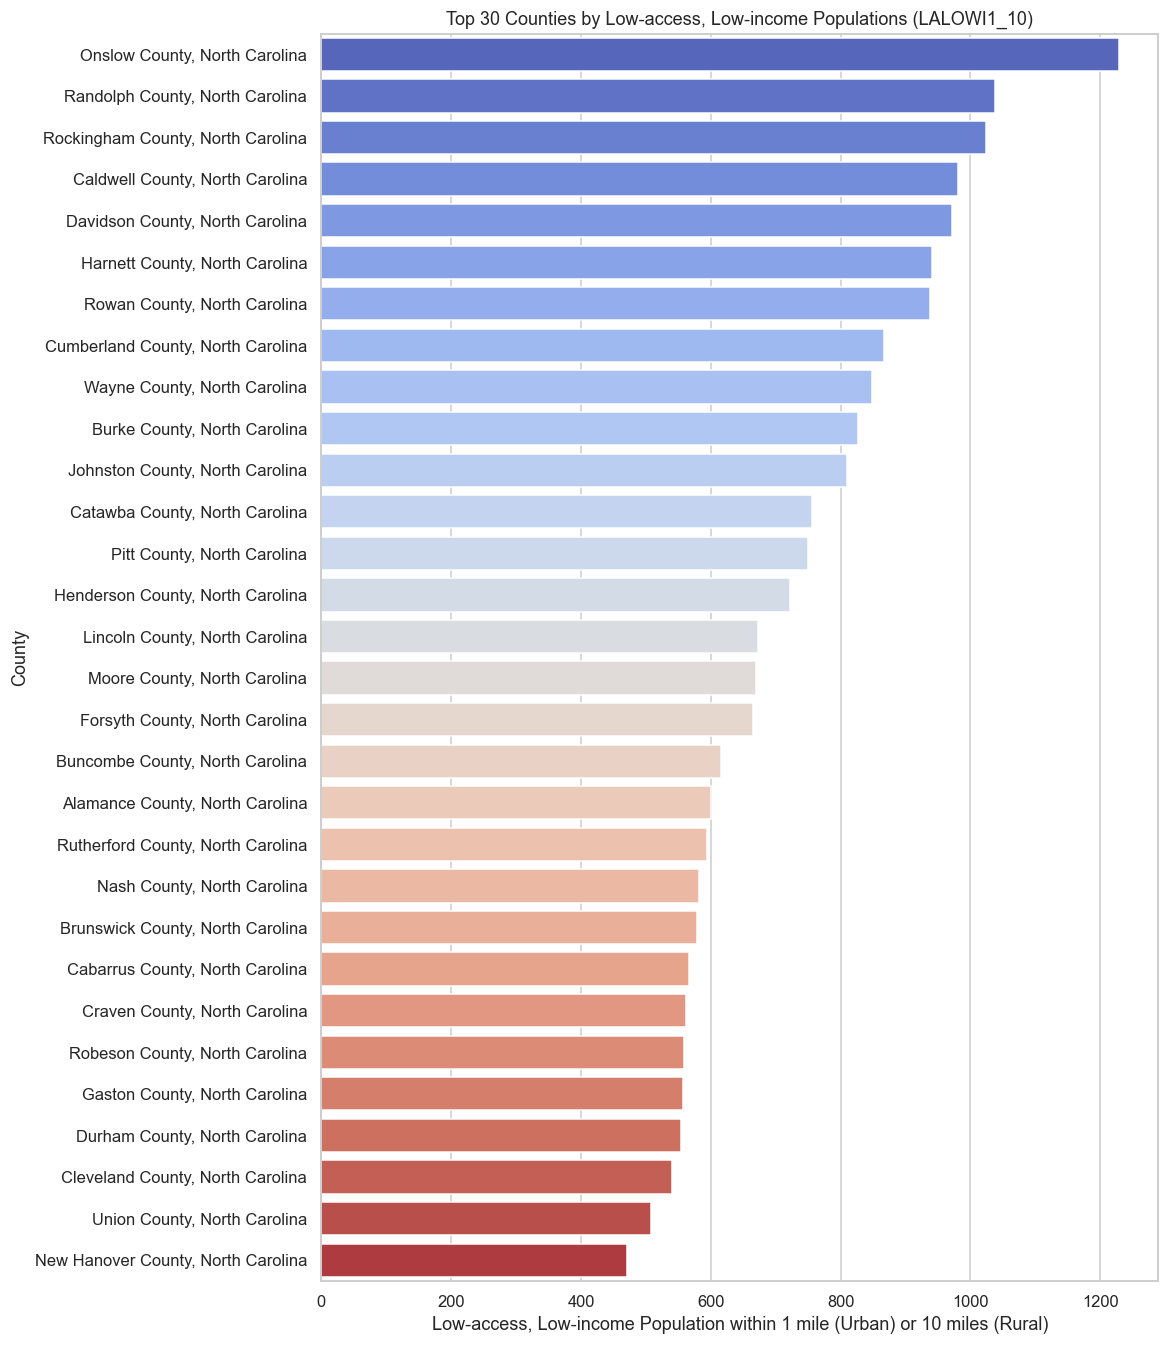

In [19]:
# Attempting a different approach to plot the bar chart to avoid the internal issue
import seaborn as sns

# We'll use seaborn for a potentially more robust plotting
sns.set_theme(style="whitegrid")

# Plotting the top 30 counties for readability, again
plt.figure(figsize=(10, 15))
bar_plot = sns.barplot(x='LALOWI1_10', y='County_State', data=lalowi_data_sorted.head(30),
                       palette='coolwarm', edgecolor='w')

# Adding labels and title
plt.xlabel('Low-access, Low-income Population within 1 mile (Urban) or 10 miles (Rural)')
plt.ylabel('County')
plt.title('Top 30 Counties by Low-access, Low-income Populations (LALOWI1_10)')
plt.show()


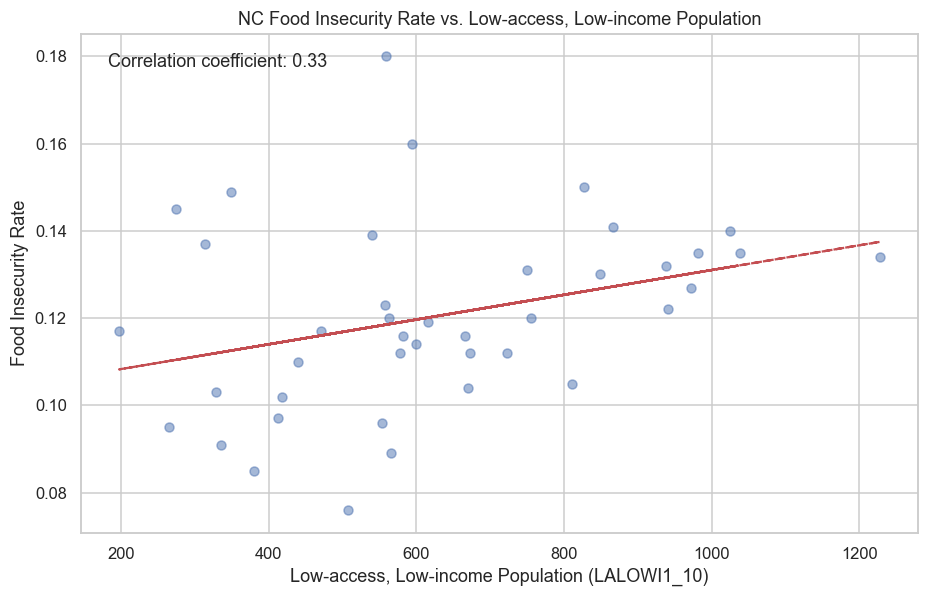

0.32522288624503654

In [20]:
# Calculating the correlation coefficient between LALOWI1_10 and Food Insecurity Rate among White, non-Hispanic Persons

correlation_data = df[['LALOWI1_10', food_insecurity_column]].dropna()

correlation_coefficient = correlation_data.corr().iloc[0, 1]



# Creating the scatter plot to visualize the relationship

plt.figure(figsize=(10, 6))

plt.scatter(correlation_data['LALOWI1_10'], correlation_data[food_insecurity_column], alpha=0.5)



# Adding a trend line

z = np.polyfit(correlation_data['LALOWI1_10'], correlation_data[food_insecurity_column], 1)

p = np.poly1d(z)

plt.plot(correlation_data['LALOWI1_10'], p(correlation_data['LALOWI1_10']), "r--")



# Labels and title

plt.title('NC Food Insecurity Rate vs. Low-access, Low-income Population')

plt.xlabel('Low-access, Low-income Population (LALOWI1_10)')

plt.ylabel('Food Insecurity Rate')

plt.grid(True)



# Show the correlation coefficient on the plot

plt.figtext(0.15, 0.85, f'Correlation coefficient: {correlation_coefficient:.2f}', fontsize=12, va='top', ha='left')



plt.show()



correlation_coefficient

In [21]:
# Summing the population counts for each level of education
df['total_male_pop'] = df[['eduattain_male_pop_18_24',
                               'eduattain_male_pop_25_34',
                               'eduattain_male_pop_35_44',
                               'eduattain_male_pop_45_64',
                               'eduattain_male_pop_65_plus']].sum(axis=1)

# Summing the population counts for males with at least a high school diploma
df['total_male_high_or_higher'] = df[['eduattain_male_pop_18_24_high',
                                          'eduattain_male_pop_18_24_some_college',
                                          'eduattain_male_pop_18_24_bachelors_or_higher',
                                          'eduattain_male_pop_25_34_high_or_higher',
                                          'eduattain_male_pop_35_44_high_or_higher',
                                          'eduattain_male_pop_45_64_high_or_higher',
                                          'eduattain_male_pop_65_plus_high_or_higher']].sum(axis=1)

# Calculating the educational attainment rate
df['eduattain_male_rate'] = (df['total_male_high_or_higher'] / df['total_male_pop']) * 100


In [22]:
# Summing the population counts for each level of education
df['total_female_pop'] = df[['eduattain_female_18_24',
                                 'eduattain_female_25_34',
                                 'eduattain_female_35_44',
                                 'eduattain_female_45_64',
                                 'eduattain_female_65_over']].sum(axis=1)

# Summing the population counts for females with at least a high school diploma
df['total_female_high_or_higher'] = df[['eduattain_female_18_24_high',
                                            'eduattain_female_18_24_some_college',
                                            'eduattain_female_18_24_bachelors_higher',
                                            'eduattain_female_25_34_high_or_higher',
                                            'eduattain_female_35_44_high_or_higher',
                                            'eduattain_female_45_64_high_or_higher',
                                            'eduattain_female_65_over_high_or_higher']].sum(axis=1)

# Calculating the educational attainment rate
df['eduattain_female_rate'] = (df['total_female_high_or_higher'] / df['total_female_pop']) * 100


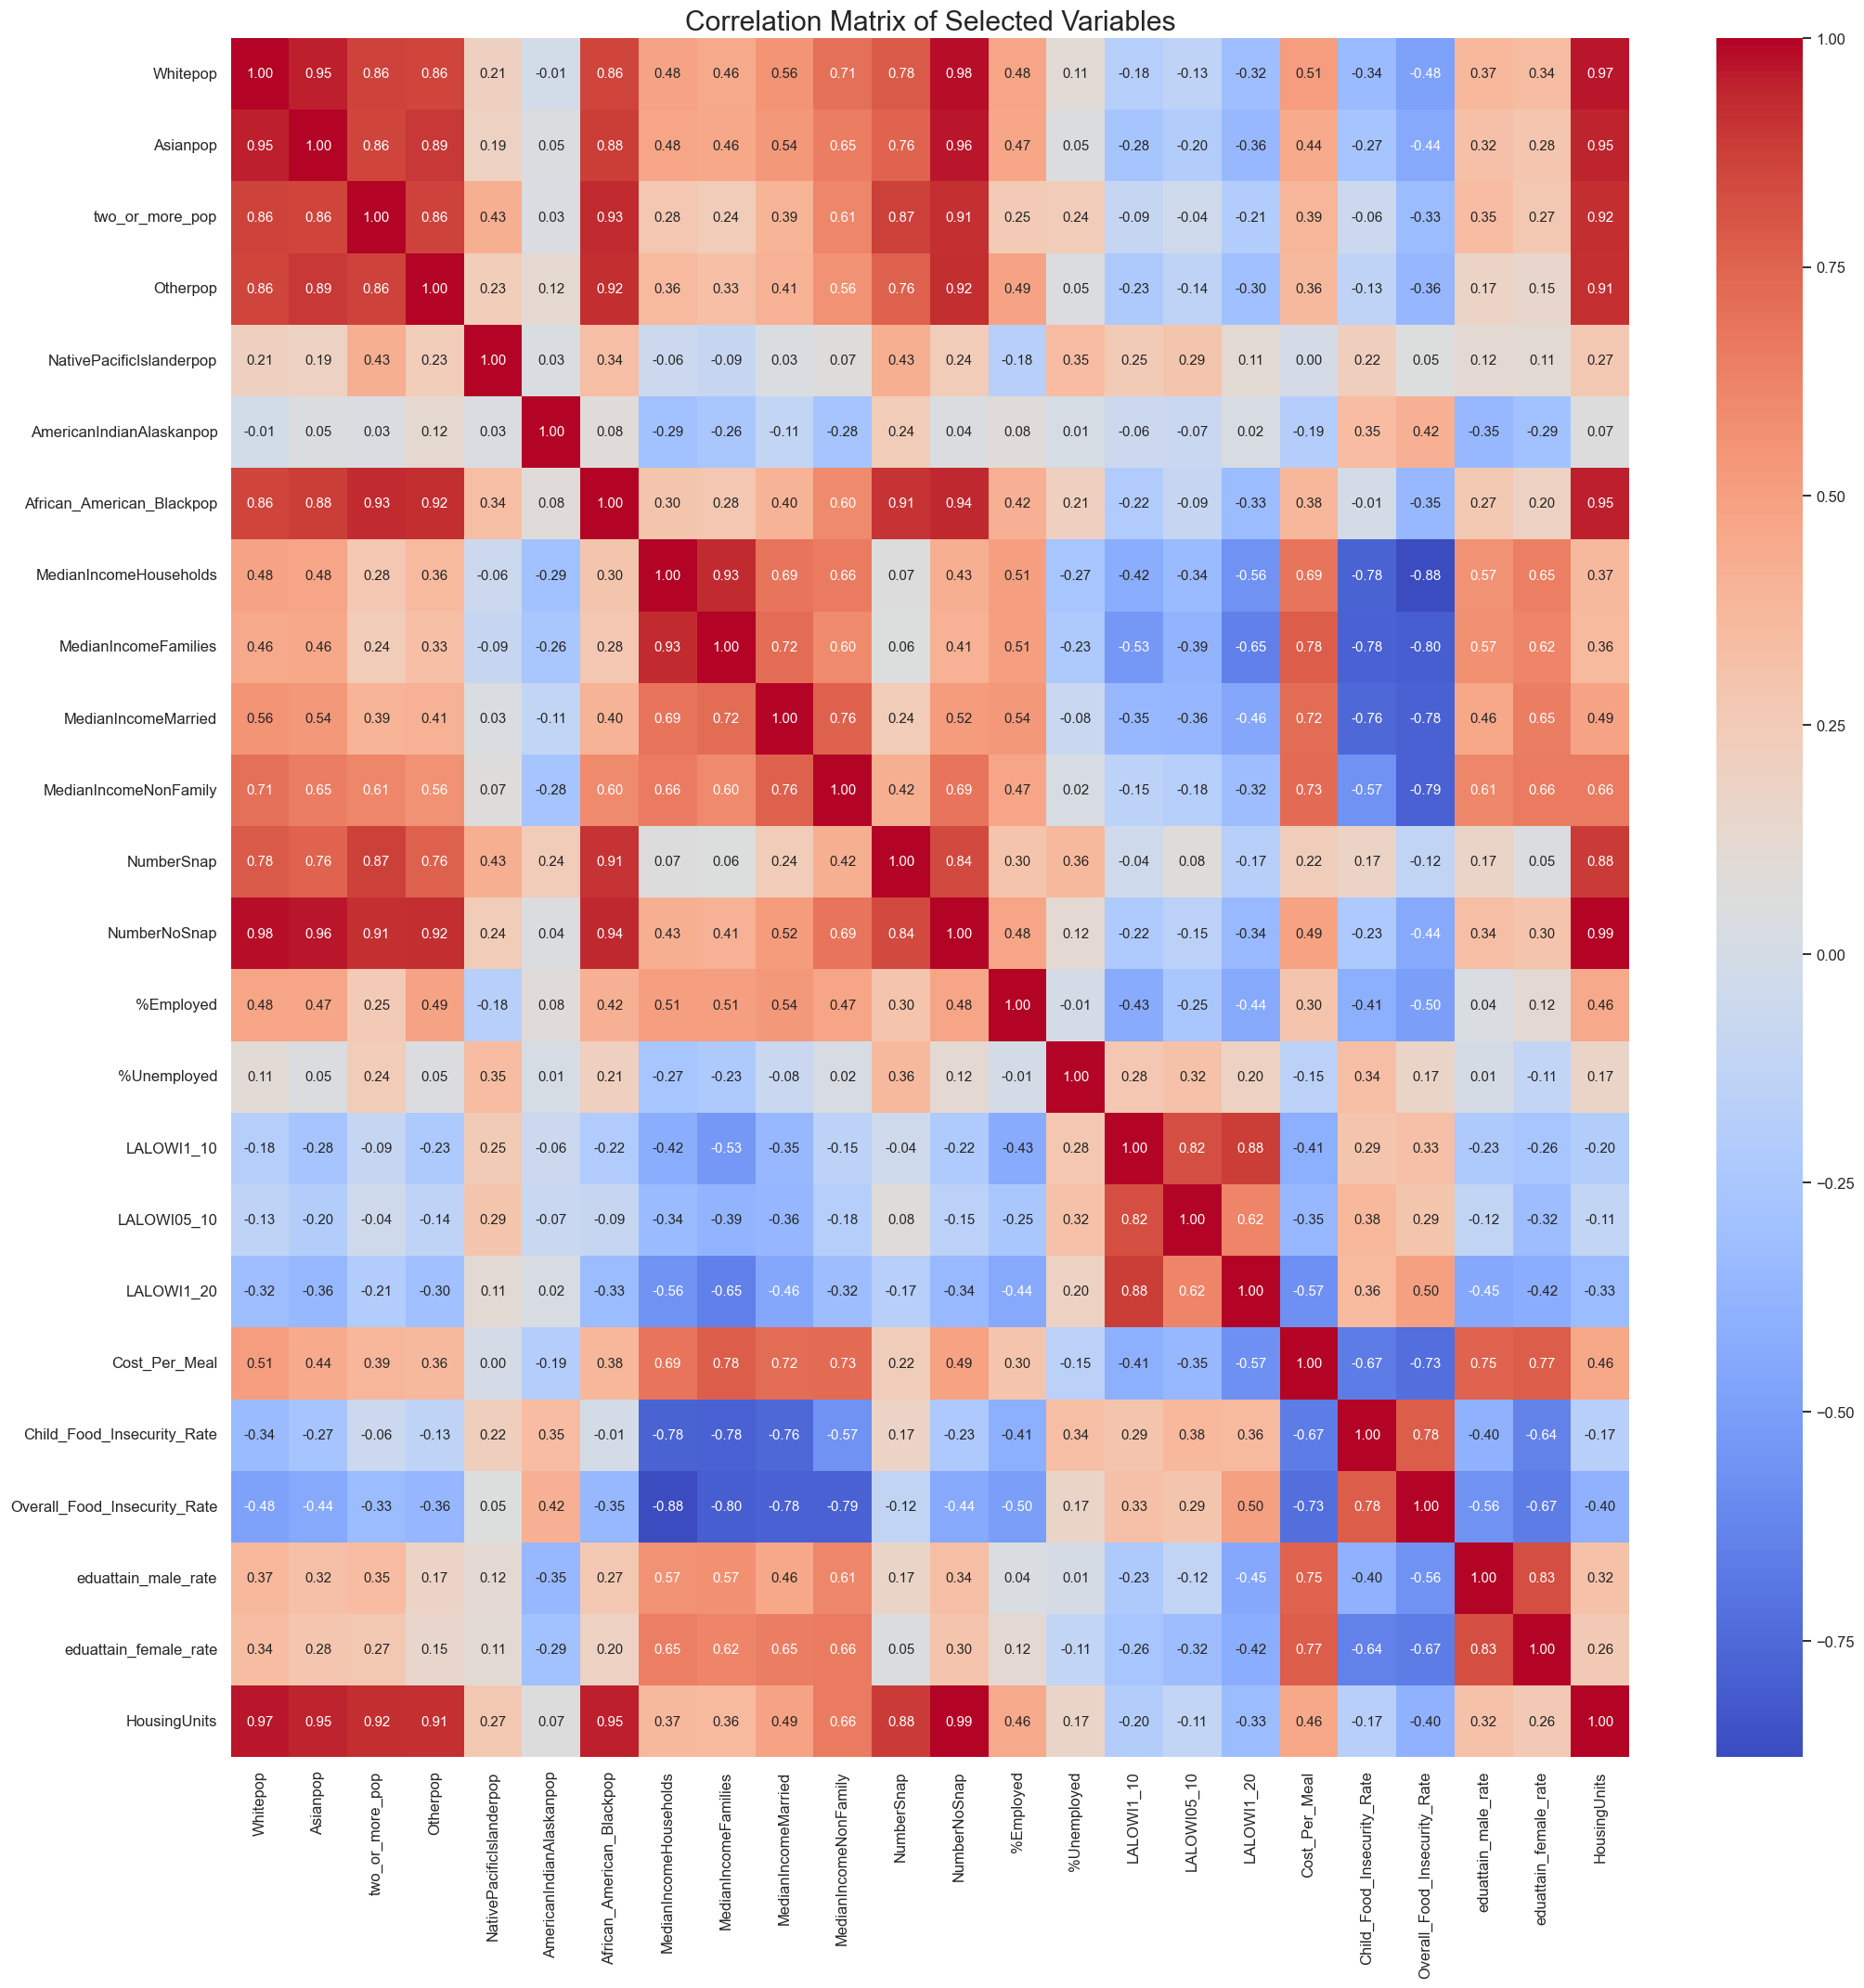

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and it includes the necessary columns

# List of columns to include in the correlation matrix
correlation_columns = [
    'Whitepop', 'Asianpop', 'two_or_more_pop', 'Otherpop',
    'NativePacificIslanderpop', 'AmericanIndianAlaskanpop',
    'African_American_Blackpop', 'MedianIncomeHouseholds',
    'MedianIncomeFamilies', 'MedianIncomeMarried', 'MedianIncomeNonFamily',
    'NumberSnap', 'NumberNoSnap', '%Employed', '%Unemployed',
    'LALOWI1_10', 'LALOWI05_10', 'LALOWI1_20', 'Cost_Per_Meal',
    'Child_Food_Insecurity_Rate', 'Overall_Food_Insecurity_Rate', 'eduattain_male_rate', 'eduattain_female_rate', 'HousingUnits'
]

# Calculating the correlation matrix
correlation_matrix = df[correlation_columns].corr()

# Increasing the figure size for better readability
plt.figure(figsize=(20, 20))  # You may need to adjust this depending on your screen resolution

# Generating the heatmap without a mask
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            annot_kws={"size": 10})  # Reducing the font size of annotations

# Rotating the x-axis labels to make them readable
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability

# Rotating the y-axis labels to make them readable
plt.yticks(rotation=0)

# Adding a title with a larger font size
plt.title('Correlation Matrix of Selected Variables', fontsize=20)

# Adjusting the layout
plt.tight_layout()  # This will fit the layout to the figure area

# Showing the plot
plt.show()



In [24]:
df_clus=df[['Whitepop', 'Asianpop', 'two_or_more_pop', 'Otherpop',
    'NativePacificIslanderpop', 'AmericanIndianAlaskanpop',
    'African_American_Blackpop', 'MedianIncomeHouseholds',
    'MedianIncomeFamilies', 'MedianIncomeMarried', 'MedianIncomeNonFamily',
    'NumberSnap', '%Unemployed',
    'LALOWI1_10', 'LALOWI05_10', 'LALOWI1_20', 'Cost_Per_Meal',
    'Overall_Food_Insecurity_Rate', 'eduattain_male_rate', 'HousingUnits', 'County_State']]

In [25]:
df_clus=df_clus.dropna()

In [26]:
df_clus2=df_clus.drop('County_State',axis=1)

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_sc = sc.fit_transform(df_clus2)
df_sc = pd.DataFrame(df_sc, columns=df_clus2.columns)

In [28]:
from sklearn.cluster import KMeans

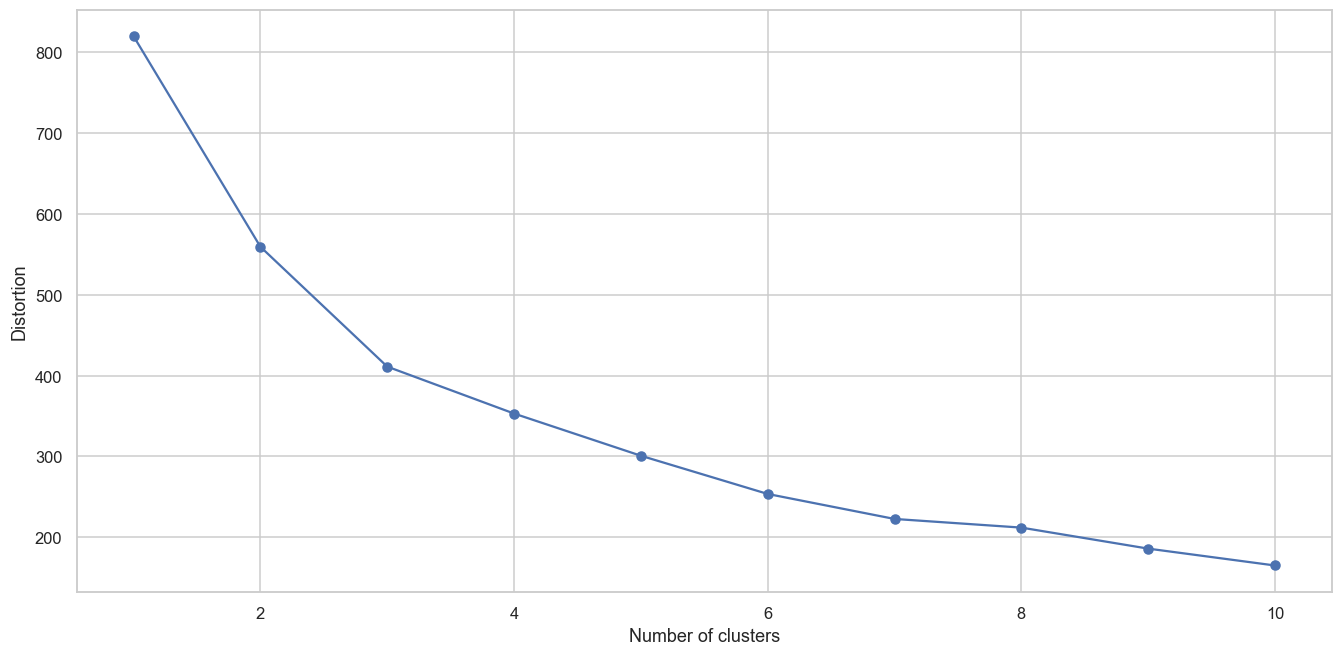

In [29]:
distortions = []

for i  in range(1,11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(df_sc)
    distortions.append(km.inertia_)

plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [30]:
model = KMeans(n_clusters=4, random_state=1)
model.fit(df_sc)

KMeans(n_clusters=4, random_state=1)

In [31]:
cluster = model.labels_

In [32]:
df_clus['Cluster']=cluster

In [33]:
# Display the DataFrame
print(df_clus)

    Whitepop  Asianpop  two_or_more_pop  Otherpop  NativePacificIslanderpop  \
0     117967      3008             4252      8432                        72   
1     122295       940             6092      1977                        15   
2     230830      3404             4927      3976                        56   
3      74458      3192             1892      5770                       314   
4     148373      9020             7603     10784                         0   
5      72726        99             1920      2830                         0   
6      62595       593             2020       533                         0   
7     126059      7190             3505      7927                         0   
8      57614      1205             2723      5059                         0   
9      73238      1041              941      1720                         0   
10     73100      2310             2671       994                        46   
11    164571      9338            20443     10824   

In [34]:
#df_clus.groupby('Cluster').mean().style.bar(axis=0)


df_clus.groupby('Cluster').mean(numeric_only=True).style.bar(axis=0)

,Whitepop,Asianpop,two_or_more_pop,Otherpop,NativePacificIslanderpop,AmericanIndianAlaskanpop,African_American_Blackpop,MedianIncomeHouseholds,MedianIncomeFamilies,MedianIncomeMarried,MedianIncomeNonFamily,NumberSnap,%Unemployed,LALOWI1_10,LALOWI05_10,LALOWI1_20,Cost_Per_Meal,Overall_Food_Insecurity_Rate,eduattain_male_rate,HousingUnits
Cluster,,,,,,,,,,,,,,,,,,,,
0,226442.000000,18178.000000,19507.500000,13389.500000,741.500000,4135.500000,153947.500000,50810.000000,62175.500000,81703.000000,34046.500000,24754.000000,0.035000,652.930000,1290.915000,661.620000,3.700000,0.125500,89.138201,159529.500000
1,130991.200000,4167.550000,4791.000000,4971.800000,89.200000,658.550000,30988.450000,62807.800000,78627.500000,92431.650000,34915.150000,6643.050000,0.020000,546.157500,980.118000,600.388000,3.861500,0.108000,88.367644,61507.450000
2,82872.176471,1625.764706,3738.882353,3749.235294,117.000000,3650.000000,18896.823529,48832.117647,59826.764706,66994.411765,26622.411765,6756.882353,0.022353,750.920588,1299.712941,893.895882,3.395882,0.138294,83.033173,43138.411765
3,649063.500000,73755.500000,31662.000000,60249.000000,320.500000,4537.500000,291470.500000,76643.500000,95827.500000,118663.500000,48823.000000,27709.000000,0.020000,357.340000,785.245000,357.340000,4.165000,0.088000,90.673582,353929.000000


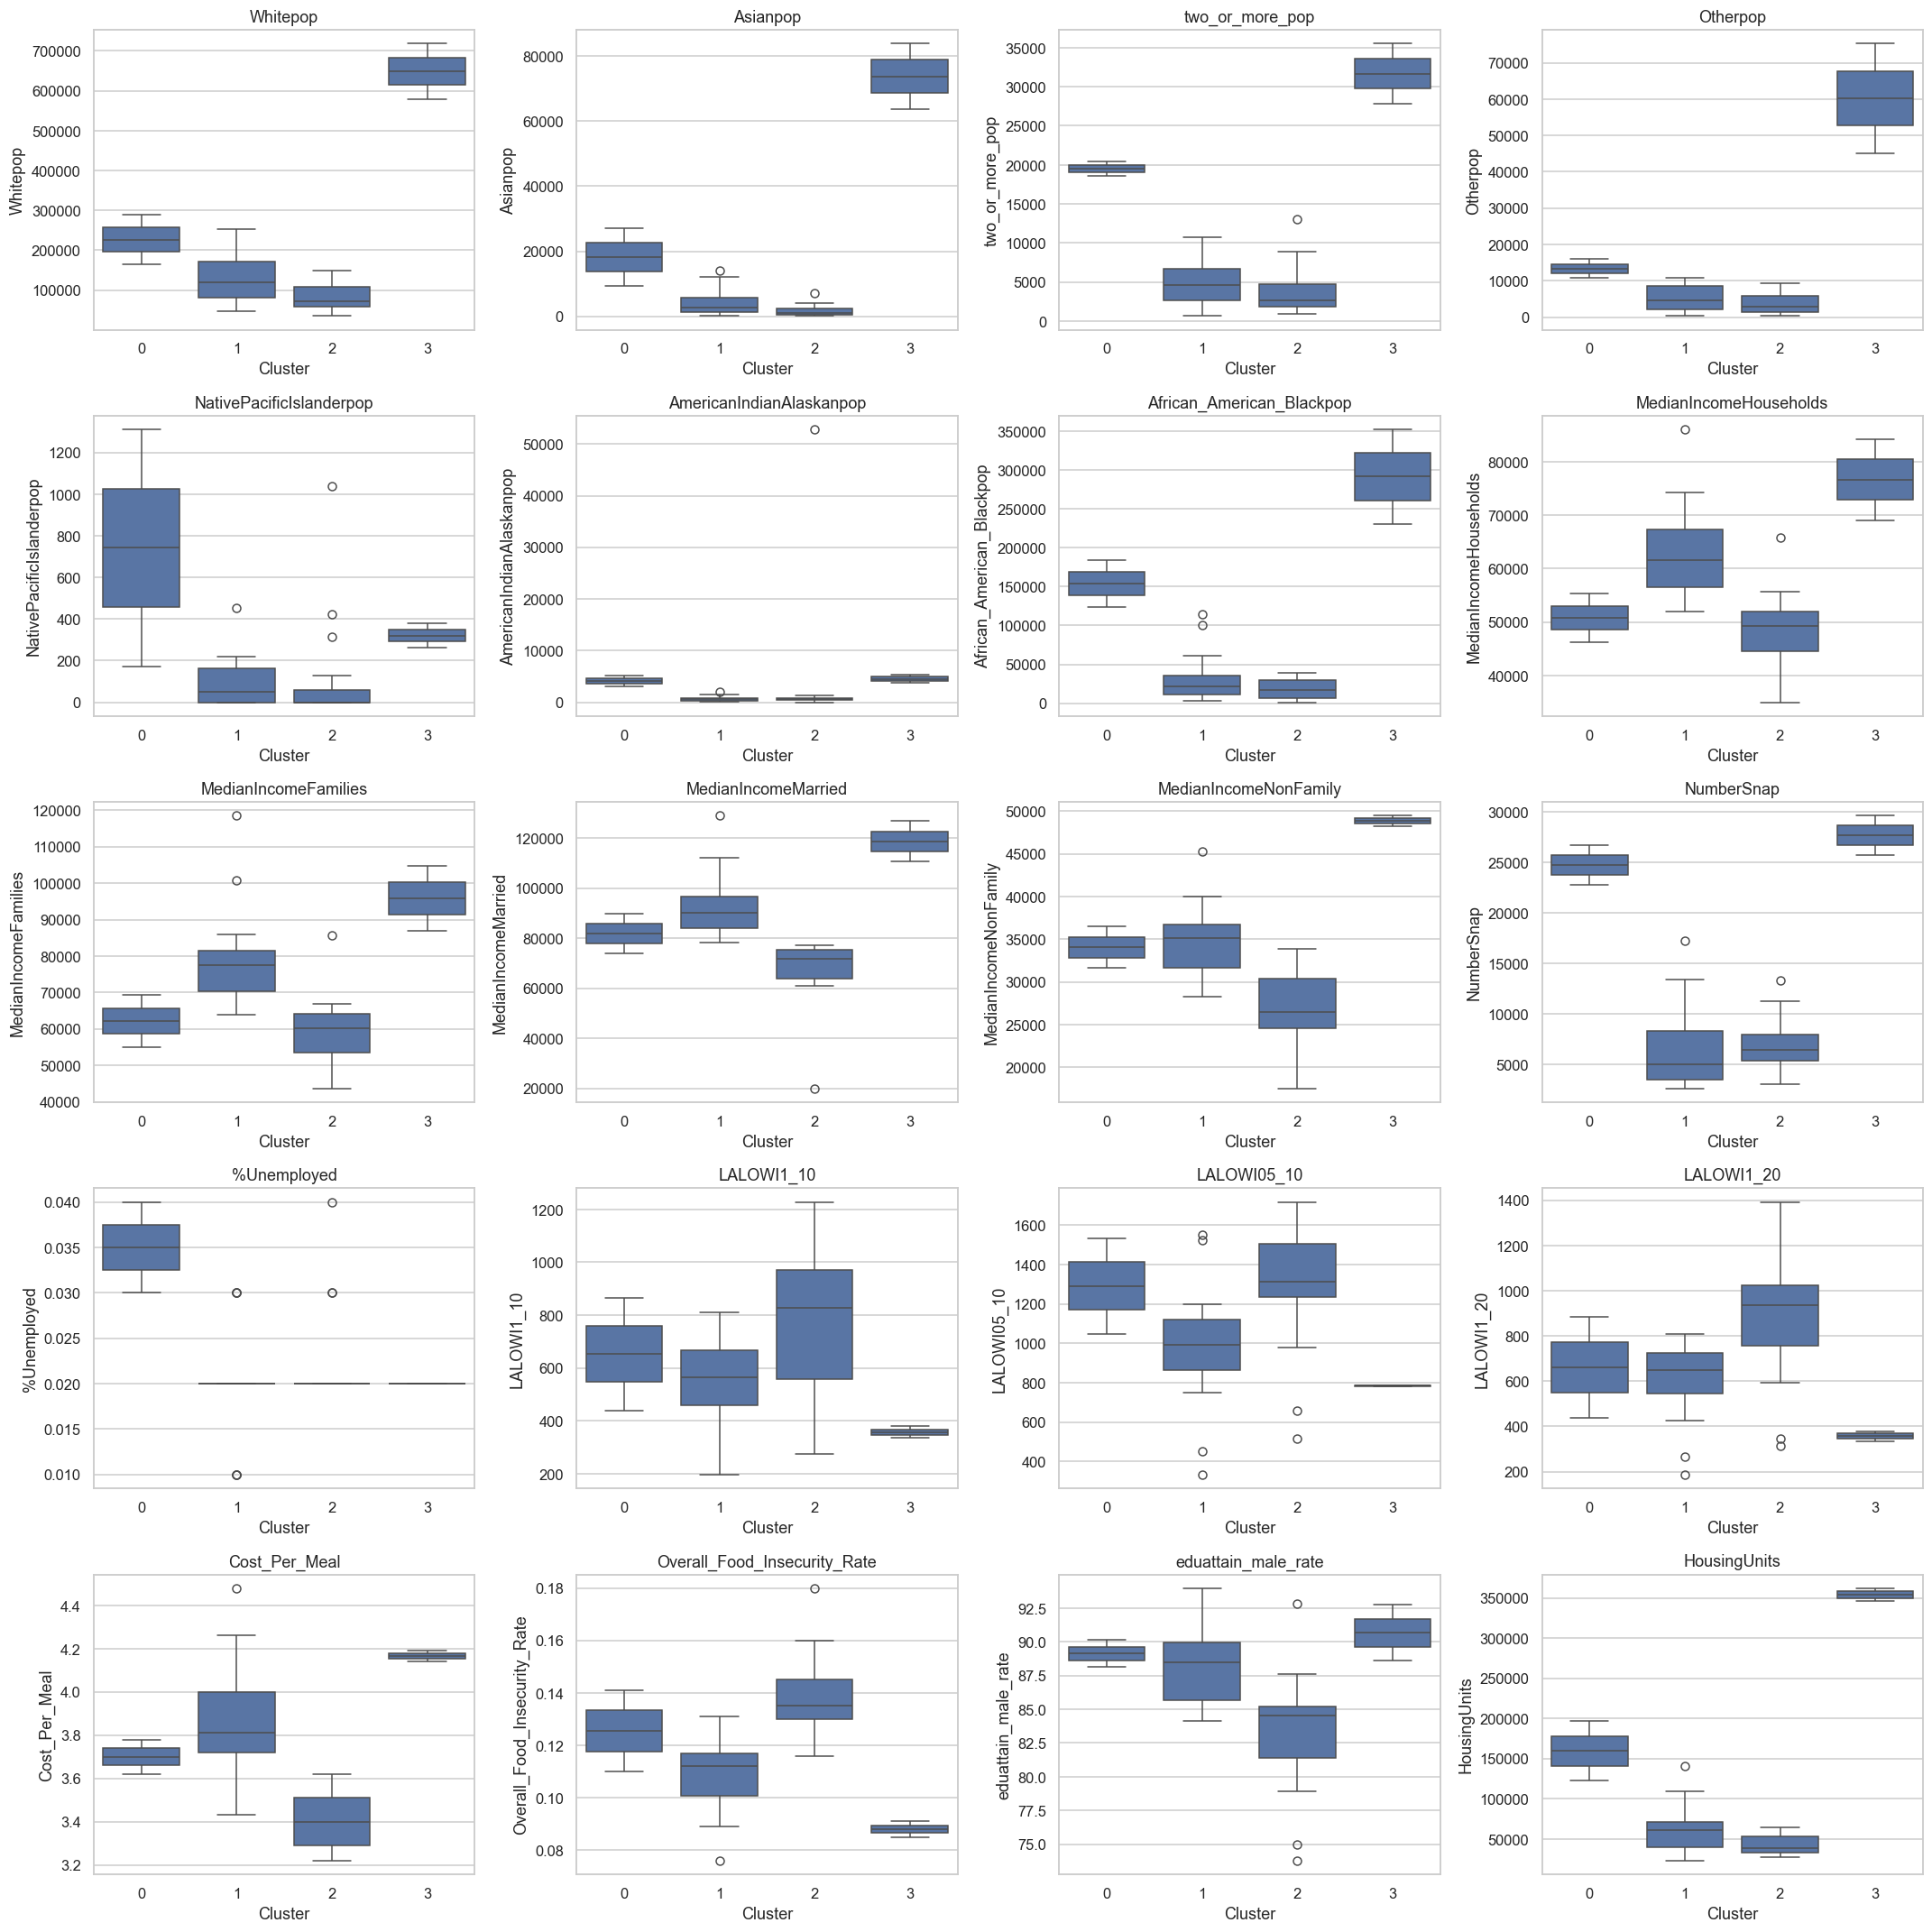

In [35]:
# Your list of columns to plot
col = ['Whitepop', 'Asianpop', 'two_or_more_pop', 'Otherpop',
       'NativePacificIslanderpop', 'AmericanIndianAlaskanpop',
       'African_American_Blackpop', 'MedianIncomeHouseholds',
       'MedianIncomeFamilies', 'MedianIncomeMarried', 'MedianIncomeNonFamily',
       'NumberSnap', '%Unemployed',
       'LALOWI1_10', 'LALOWI05_10', 'LALOWI1_20', 'Cost_Per_Meal',
       'Overall_Food_Insecurity_Rate', 'eduattain_male_rate', 'HousingUnits']

# Set the figure size larger to accommodate 20 subplots
fig = plt.figure(figsize=(20, 20))

# Loop over the range of columns
for i in range(len(col)):
    # Create a subplot with 5 rows and 4 columns
    plt.subplot(5, 4, i+1)
    plt.title(col[i])
    # Create the boxplot
    sns.boxplot(data=df_clus, y=col[i], x='Cluster')

# Adjust the layout so subplots don't overlap
plt.tight_layout()
plt.show()


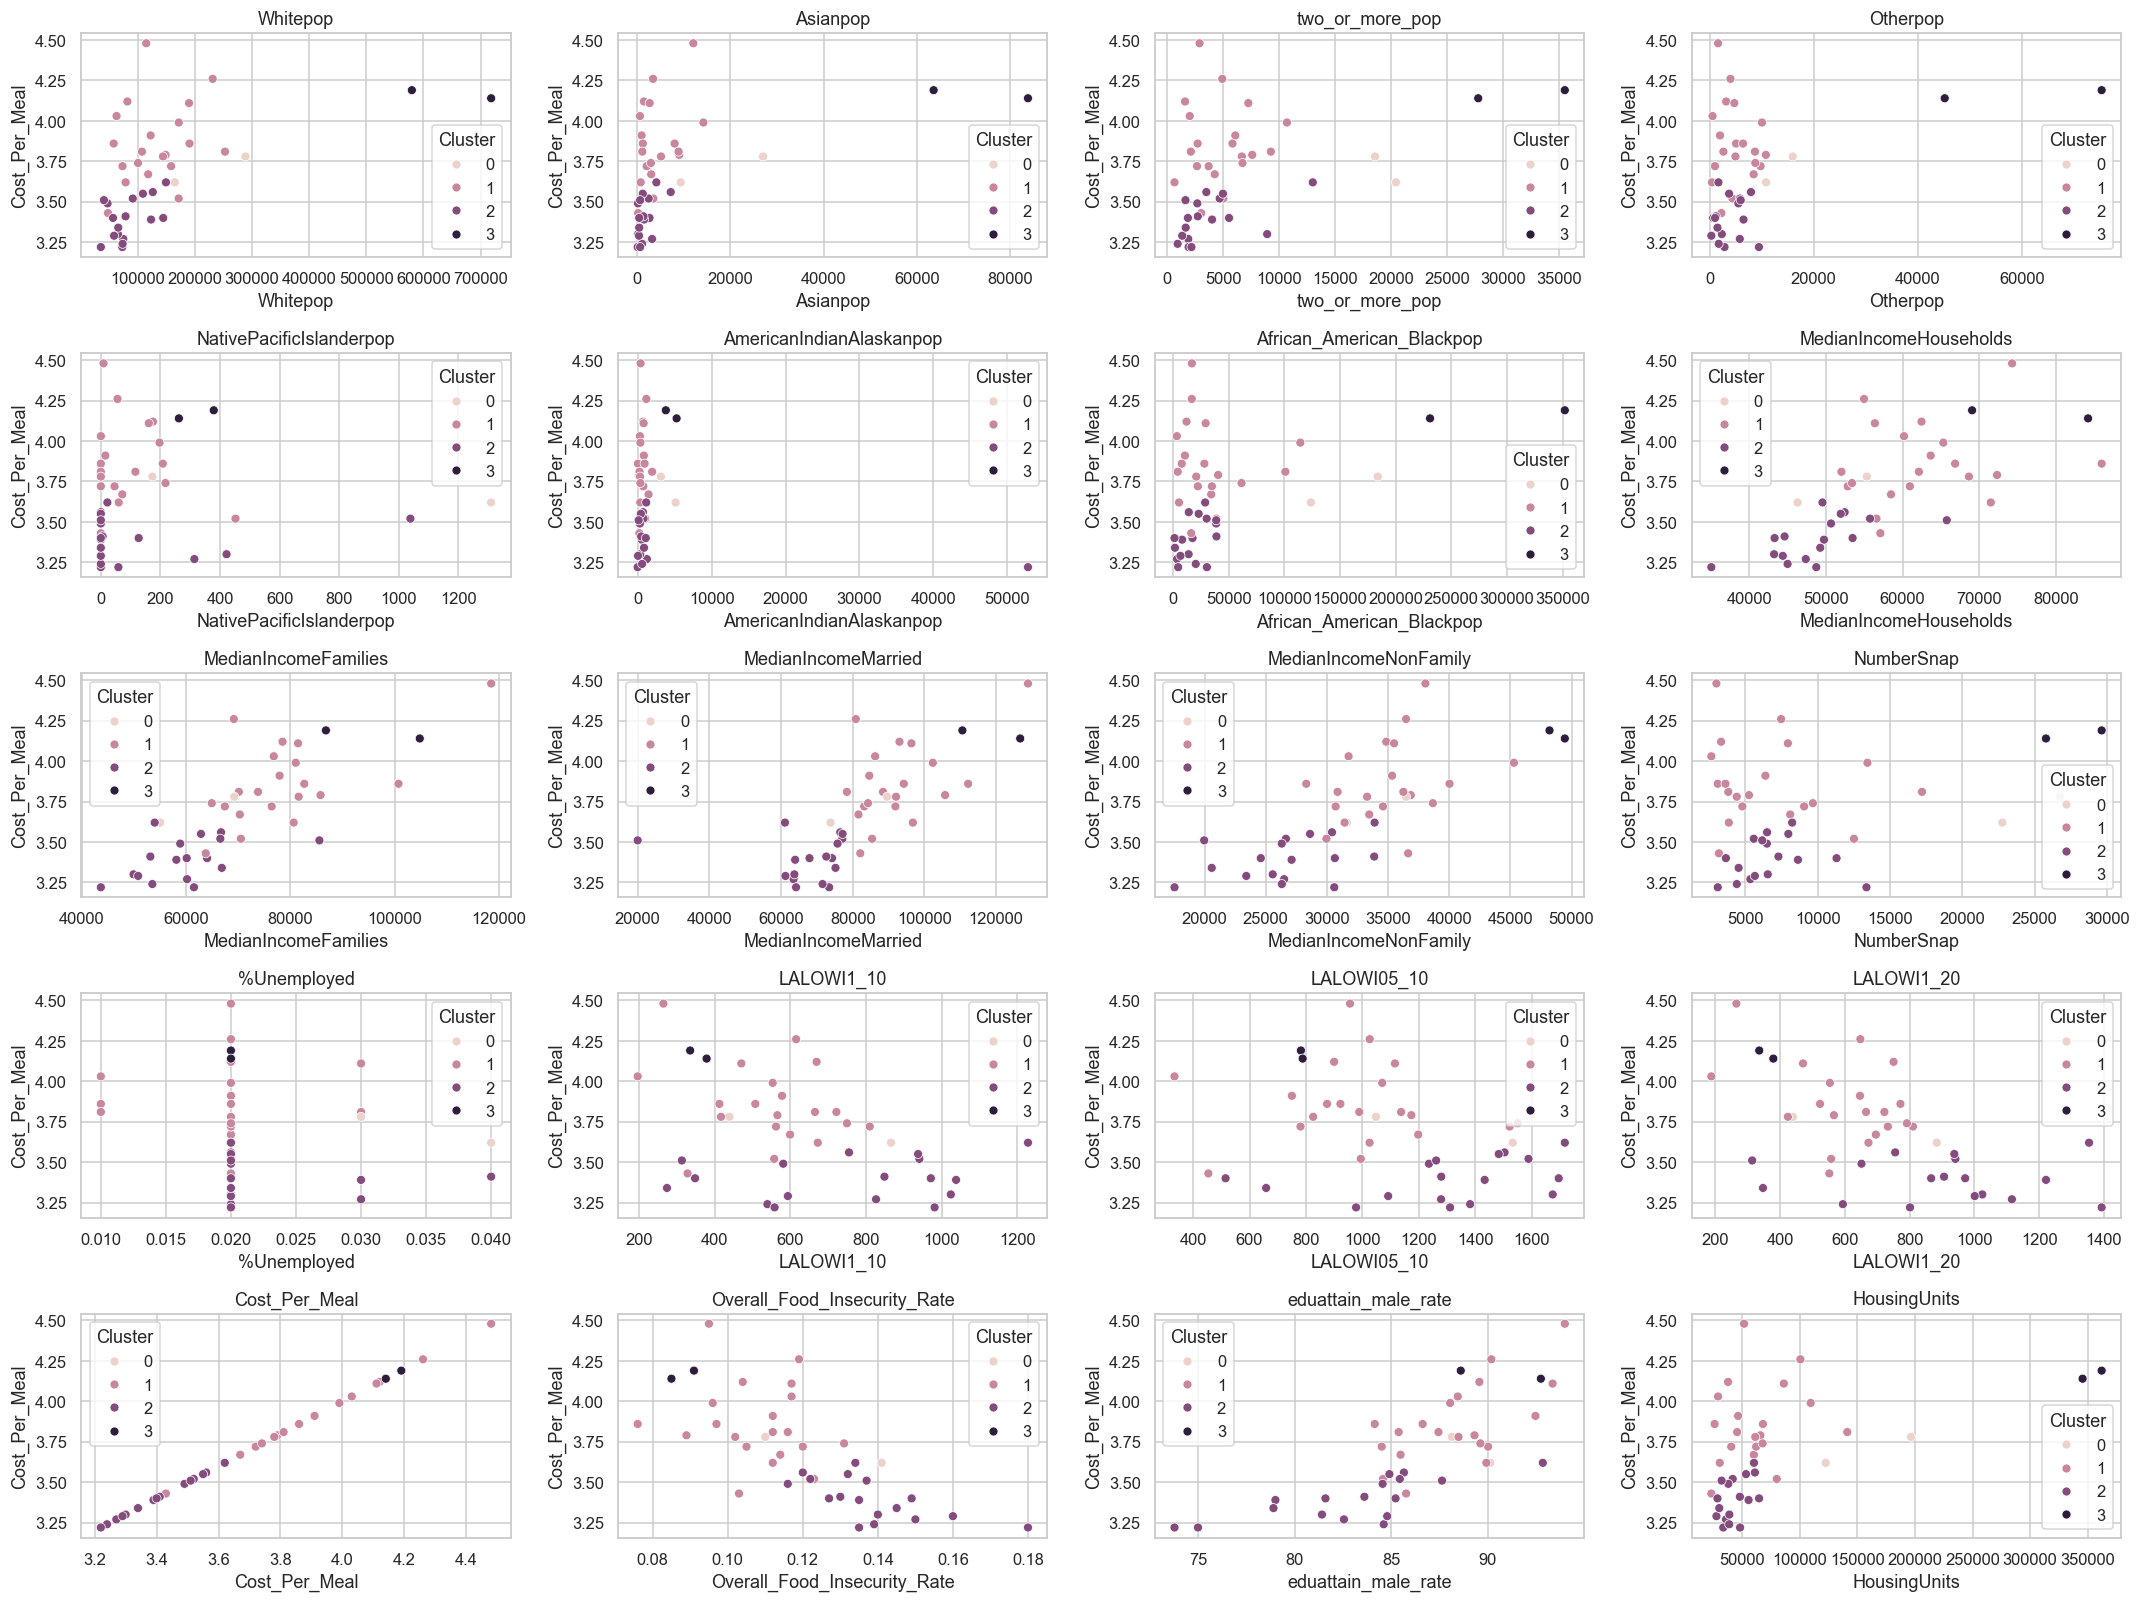

In [36]:
col2 = ['Whitepop', 'Asianpop', 'two_or_more_pop', 'Otherpop',
        'NativePacificIslanderpop', 'AmericanIndianAlaskanpop',
        'African_American_Blackpop', 'MedianIncomeHouseholds',
        'MedianIncomeFamilies', 'MedianIncomeMarried', 'MedianIncomeNonFamily',
        'NumberSnap', '%Unemployed',
        'LALOWI1_10', 'LALOWI05_10', 'LALOWI1_20', 'Cost_Per_Meal',
        'Overall_Food_Insecurity_Rate', 'eduattain_male_rate', 'HousingUnits']

# Setting up the figure size to accommodate 20 subplots
fig = plt.figure(figsize=(20, 15))

# Looping over all elements in col2
for i in range(len(col2)):
    # Create a subplot in a 5x4 grid
    plt.subplot(5, 4, i+1)
    # Set the title of the subplot
    plt.title(col2[i])
    # Plot the scatter plot for each column
    sns.scatterplot(data=df_clus, x=col2[i], y='Cost_Per_Meal', hue='Cluster')

# Adjust the layout so subplots don't overlap
plt.tight_layout()
plt.show()

In [37]:
df_clus[df_clus['Cluster']==0].sort_values('Overall_Food_Insecurity_Rate',ascending=False)

,Whitepop,Asianpop,two_or_more_pop,Otherpop,NativePacificIslanderpop,AmericanIndianAlaskanpop,African_American_Blackpop,MedianIncomeHouseholds,MedianIncomeFamilies,MedianIncomeMarried,...,%Unemployed,LALOWI1_10,LALOWI05_10,LALOWI1_20,Cost_Per_Meal,Overall_Food_Insecurity_Rate,eduattain_male_rate,HousingUnits,County_State,Cluster
11,164571,9338,20443,10824,1310,5130,123893,46292,55078,73799,...,0.04,866.38,1533.36,883.76,3.62,0.141,90.129943,122431,"Cumberland County, North Carolina",0
17,288313,27018,18572,15955,173,3141,184002,55328,69273,89607,...,0.03,439.48,1048.47,439.48,3.78,0.110,88.146459,196628,"Guilford County, North Carolina",0


In [38]:
df_clus[df_clus['Cluster']==1].sort_values('Overall_Food_Insecurity_Rate',ascending=False)

,Whitepop,Asianpop,two_or_more_pop,Otherpop,NativePacificIslanderpop,AmericanIndianAlaskanpop,African_American_Blackpop,MedianIncomeHouseholds,MedianIncomeFamilies,MedianIncomeMarried,...,%Unemployed,LALOWI1_10,LALOWI05_10,LALOWI1_20,Cost_Per_Meal,Overall_Food_Insecurity_Rate,eduattain_male_rate,HousingUnits,County_State,Cluster
29,100199,2936,6733,8754,217,366,61537,53401,64962,84253,...,0.02,749.89,1550.63,791.56,3.74,0.131,89.616055,67577,"Pitt County, North Carolina",1
16,171404,3455,5024,4361,452,1008,38825,56595,70537,85398,...,0.02,557.66,994.54,557.66,3.52,0.123,84.572819,79867,"Gaston County, North Carolina",1
10,73100,2310,2671,994,46,704,22314,52832,67467,83191,...,0.02,562.50,780.72,732.83,3.72,0.120,90.015710,40299,"Craven County, North Carolina",1
2,230830,3404,4927,3976,56,1170,16828,54970,69181,80847,...,0.02,615.66,1026.22,647.78,4.26,0.119,90.181775,100412,"Buncombe County, North Carolina",1
6,62595,593,2020,533,0,301,3431,60186,76840,86239,...,0.01,196.88,333.88,187.67,4.03,0.117,88.445011,28870,"Carteret County, North Carolina",1
26,189556,2674,7256,4722,161,805,29299,56382,81497,96366,...,0.03,470.87,1115.70,470.87,4.11,0.117,93.354545,86046,"New Hanover County, North Carolina",1
14,252469,8884,9268,8682,116,1953,100923,52017,70148,88444,...,0.03,665.41,1137.45,665.41,3.81,0.116,85.387411,141163,"Forsyth County, North Carolina",1
0,117967,3008,4252,8432,72,1471,34307,58490,70332,81592,...,0.02,599.71,1198.21,695.70,3.67,0.114,85.484827,59960,"Alamance County, North Carolina",1
1,122295,940,6092,1977,15,835,10666,63668,77959,84611,...,0.02,578.31,750.19,646.79,3.91,0.112,92.467358,46297,"Brunswick County, North Carolina",1
19,107103,1098,2118,2622,0,253,4223,62131,73823,78351,...,0.01,722.08,989.13,722.08,3.81,0.112,87.447477,45448,"Henderson County, North Carolina",1


In [39]:
df_clus[df_clus['Cluster']==2].sort_values('Overall_Food_Insecurity_Rate',ascending=False)

,Whitepop,Asianpop,two_or_more_pop,Otherpop,NativePacificIslanderpop,AmericanIndianAlaskanpop,African_American_Blackpop,MedianIncomeHouseholds,MedianIncomeFamilies,MedianIncomeMarried,...,%Unemployed,LALOWI1_10,LALOWI05_10,LALOWI1_20,Cost_Per_Meal,Overall_Food_Insecurity_Rate,eduattain_male_rate,HousingUnits,County_State,Cluster
31,35102,628,2174,9448,59,52786,30428,35035,43698,64172,...,0.02,558.77,977.80,801.22,3.22,0.180,75.000535,47997,"Robeson County, North Carolina",2
34,58284,383,1347,301,0,54,6660,44361,50846,61201,...,0.02,593.83,1091.67,1001.00,3.29,0.160,84.793743,27466,"Rutherford County, North Carolina",2
3,74458,3192,1892,5770,314,1240,3619,47361,60227,63480,...,0.03,826.82,1279.27,1115.88,3.27,0.150,82.555980,35804,"Burke County, North Carolina",2
39,56425,432,5533,1011,0,1096,1319,43290,60153,67931,...,0.02,348.57,515.00,866.50,3.40,0.149,81.597596,28360,"Wilkes County, North Carolina",2
35,65624,428,1660,1481,0,859,1731,49250,66882,75181,...,0.02,274.38,658.88,347.17,3.34,0.145,78.907298,29914,"Surry County, North Carolina",2
32,65035,210,8939,2310,422,354,13996,43230,49962,63702,...,0.02,1024.44,1675.22,1024.44,3.30,0.140,81.416808,38693,"Rockingham County, North Carolina",2
9,73238,1041,941,1720,0,601,20406,44987,53571,71565,...,0.02,539.73,1382.27,593.89,3.24,0.139,84.612833,38555,"Cleveland County, North Carolina",2
40,40482,636,1639,5941,0,133,38830,65768,85587,19967,...,0.02,313.71,1261.80,313.71,3.51,0.137,87.630402,31962,"Wilson County, North Carolina",2
5,72726,99,1920,2830,0,0,4603,48737,61547,73408,...,0.02,981.62,1311.15,1393.00,3.22,0.135,73.784287,33388,"Caldwell County, North Carolina",2
30,122978,1477,4018,6484,0,570,8140,49742,58172,63918,...,0.03,1038.36,1433.87,1221.18,3.39,0.135,79.008126,55373,"Randolph County, North Carolina",2


In [40]:
df_clus[df_clus['Cluster']==3].sort_values('Overall_Food_Insecurity_Rate',ascending=False)

,Whitepop,Asianpop,two_or_more_pop,Otherpop,NativePacificIslanderpop,AmericanIndianAlaskanpop,African_American_Blackpop,MedianIncomeHouseholds,MedianIncomeFamilies,MedianIncomeMarried,...,%Unemployed,LALOWI1_10,LALOWI05_10,LALOWI1_20,Cost_Per_Meal,Overall_Food_Insecurity_Rate,eduattain_male_rate,HousingUnits,County_State,Cluster
23,579664,63628,35530,75332,379,3809,352014,69072,86834,110595,...,0.02,335.59,782.13,335.59,4.19,0.091,88.600472,362213,"Mecklenburg County, North Carolina",3
37,718463,83883,27794,45166,262,5266,230927,84215,104821,126732,...,0.02,379.09,788.36,379.09,4.14,0.085,92.746692,345645,"Wake County, North Carolina",3


In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=1)
pca.fit(df_sc)
feature = pca.transform(df_sc)

In [42]:
df_clus['PCA1']=feature[:,0]
df_clus['PCA2']=feature[:,1]

In [43]:
#df_clus.groupby('Cluster')['PCA1','PCA2'].mean().T.style.bar(axis=1)

# Updated syntax for selecting multiple columns after a groupby operation
df_clus.groupby('Cluster')[['PCA1', 'PCA2']].mean(numeric_only=True).style.bar(axis=1)


,PCA1,PCA2
Cluster,,
0,2.271874,3.732271
1,0.678852,-1.460975
2,-2.310425,0.946730
3,10.578219,2.830273


In [44]:
pd.DataFrame(pca.components_,columns=df_sc.columns,index=['PCA1','PCA2'])

,Whitepop,Asianpop,two_or_more_pop,Otherpop,NativePacificIslanderpop,AmericanIndianAlaskanpop,African_American_Blackpop,MedianIncomeHouseholds,MedianIncomeFamilies,MedianIncomeMarried,MedianIncomeNonFamily,NumberSnap,%Unemployed,LALOWI1_10,LALOWI05_10,LALOWI1_20,Cost_Per_Meal,Overall_Food_Insecurity_Rate,eduattain_male_rate,HousingUnits
PCA1,0.294602,0.291689,0.265058,0.265664,0.057296,-0.035503,0.273093,0.236698,0.235835,0.248039,0.276453,0.215930,0.000629,-0.143156,-0.109422,-0.194206,0.248663,-0.242401,0.192714,0.289893
PCA2,0.159191,0.153517,0.258092,0.204046,0.250071,0.160583,0.241951,-0.257990,-0.279611,-0.155288,-0.046695,0.332988,0.254972,0.254419,0.255730,0.235825,-0.200992,0.230436,-0.151866,0.216222


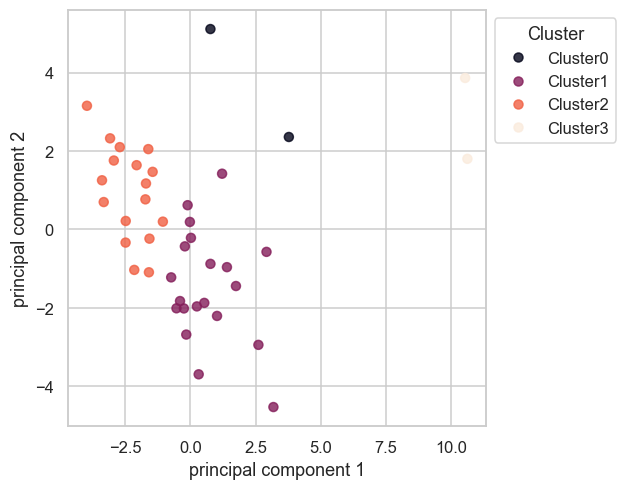

In [45]:
fig=plt.figure(figsize=(5, 5))
ax = fig.add_subplot()

scatter=ax.scatter(df_clus['PCA1'], df_clus['PCA2'],alpha=0.8, c=cluster)
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
plt.legend(handles=scatter.legend_elements()[0], labels=['Cluster0','Cluster1','Cluster2','Cluster3'],
           title="Cluster",loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [46]:
df[df['Overall_Food_Insecurity_Rate']>=0.14].sort_values('Overall_Food_Insecurity_Rate', ascending=False).head(3)

,County_State,Population,Whitepop,Asianpop,two_or_more_pop,Otherpop,NativePacificIslanderpop,AmericanIndianAlaskanpop,African_American_Blackpop,MedianIncomeHouseholds,...,Weighted weekly $ needed by FI,Weighted Annual Food Budget Shortfall,County,Percentage_25_plus_Bachelors_or_Higher,total_male_pop,total_male_high_or_higher,eduattain_male_rate,total_female_pop,total_female_high_or_higher,eduattain_female_rate
31,"Robeson County, North Carolina",130625,35102,628,2174,9448,59,52786,30428,35035,...,18.762397,12185000,Robeson County,0.148319,46717,35038,75.000535,51867,42676,82.279677
34,"Rutherford County, North Carolina",67029,58284,383,1347,301,0,54,6660,44361,...,19.157143,6009000,Rutherford County,0.197062,25187,21357,84.793743,28348,25326,89.339636
3,"Burke County, North Carolina",90485,74458,3192,1892,5770,314,1240,3619,47361,...,19.061768,7621000,Burke County,0.185778,36620,30232,82.555980,37237,30943,83.097457


Cluster Means:
              Whitepop      Asianpop  two_or_more_pop      Otherpop  \
Cluster                                                               
0        226442.000000  18178.000000     19507.500000  13389.500000   
1        130991.200000   4167.550000      4791.000000   4971.800000   
2         82872.176471   1625.764706      3738.882353   3749.235294   
3        649063.500000  73755.500000     31662.000000  60249.000000   

         NativePacificIslanderpop  AmericanIndianAlaskanpop  \
Cluster                                                       
0                           741.5                   4135.50   
1                            89.2                    658.55   
2                           117.0                   3650.00   
3                           320.5                   4537.50   

         African_American_Blackpop  MedianIncomeHouseholds  \
Cluster                                                      
0                    153947.500000            50810.000

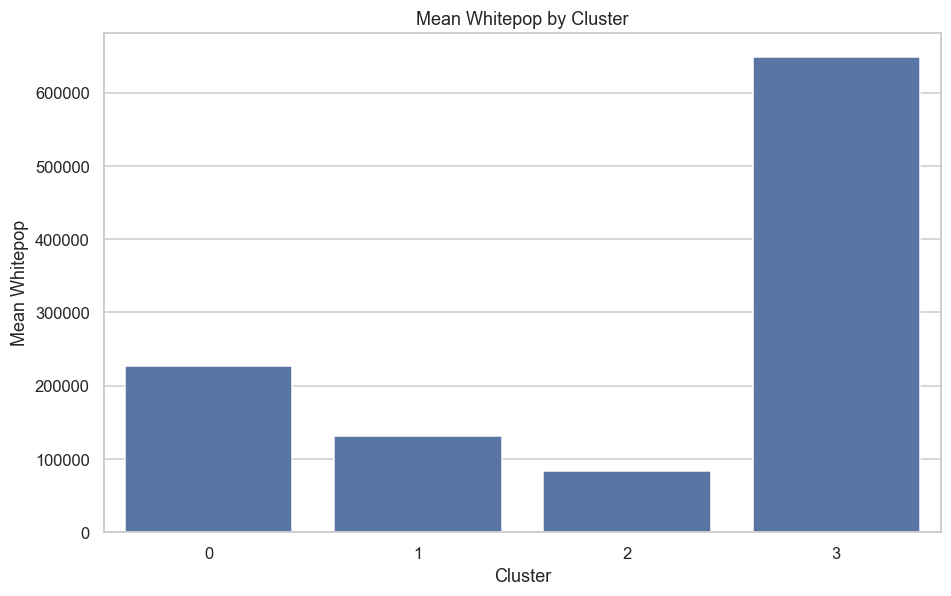

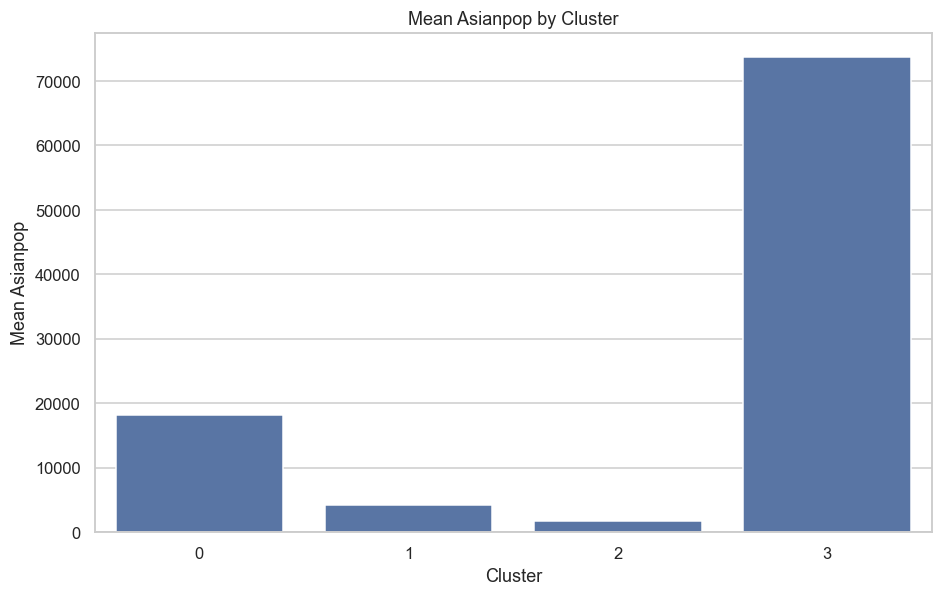

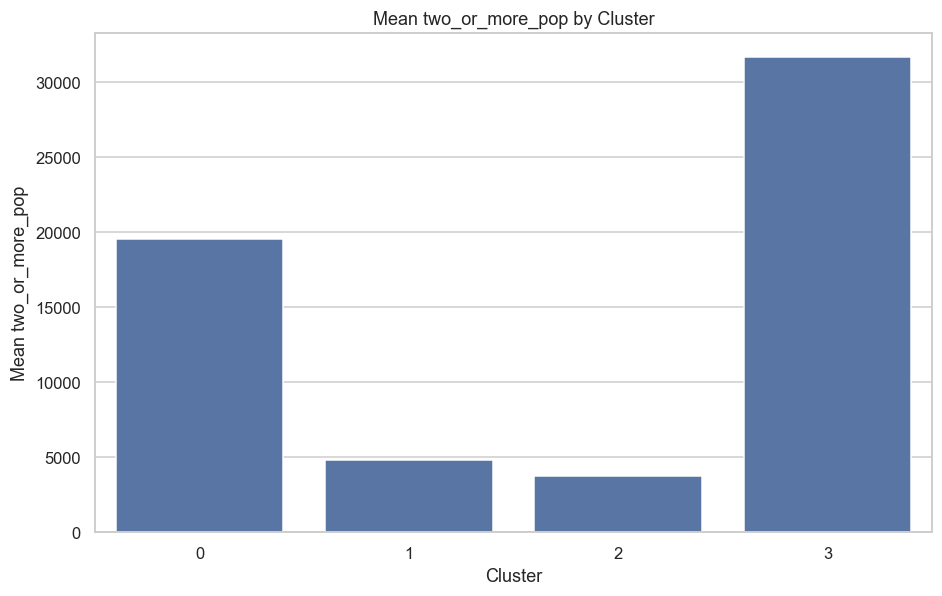

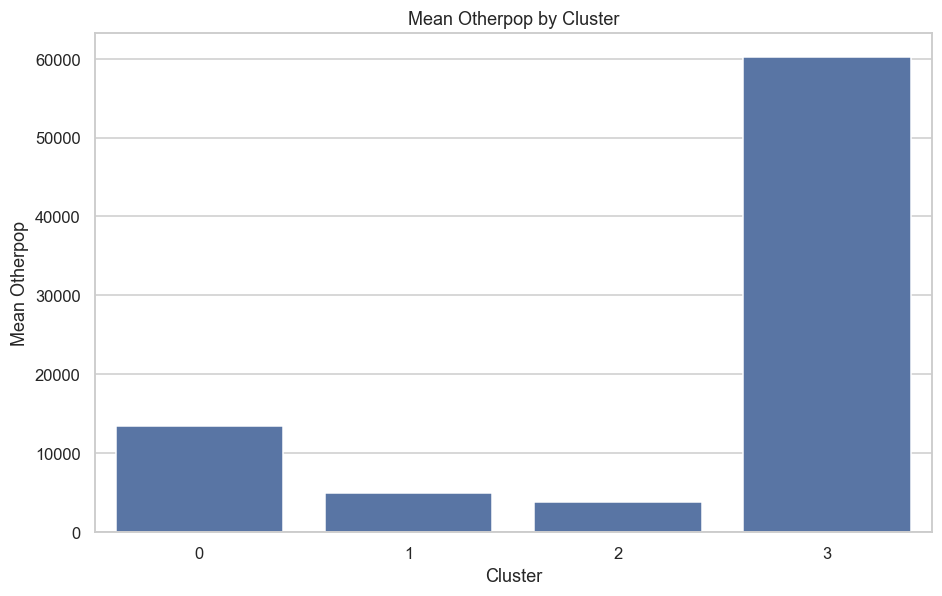

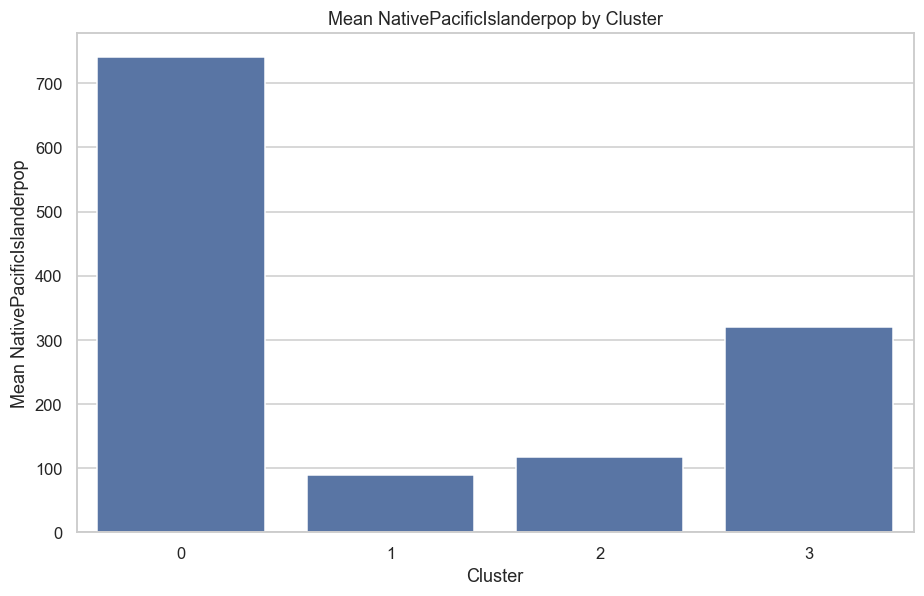

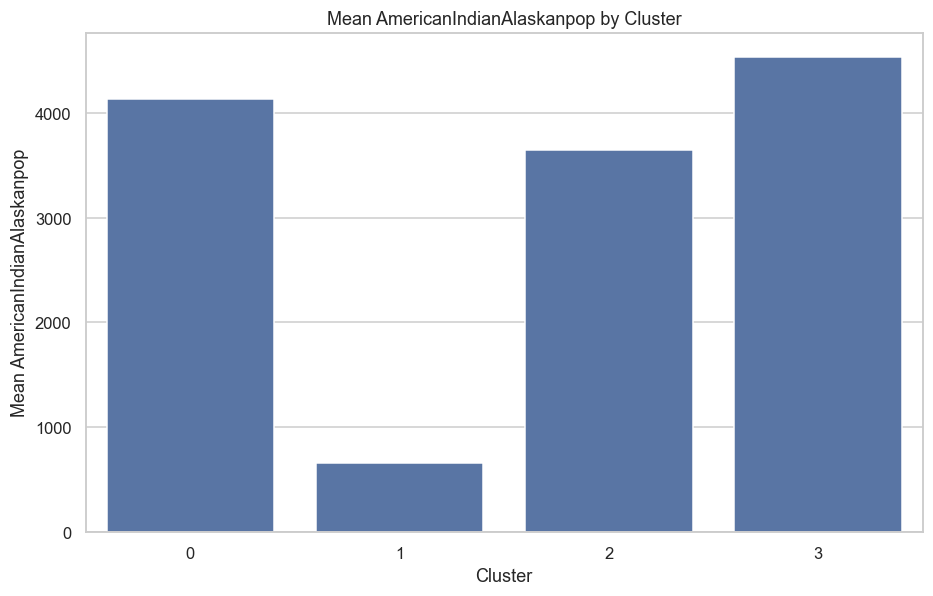

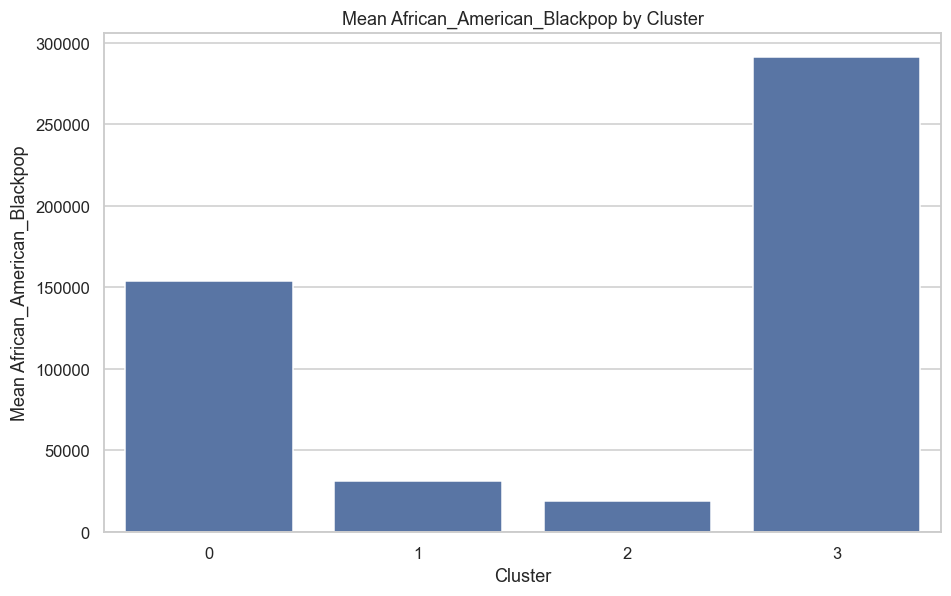

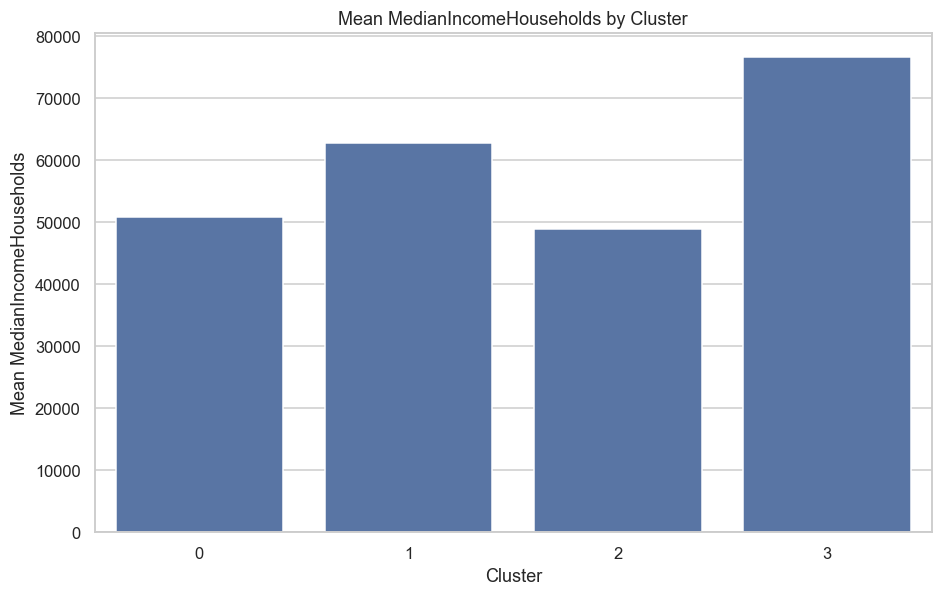

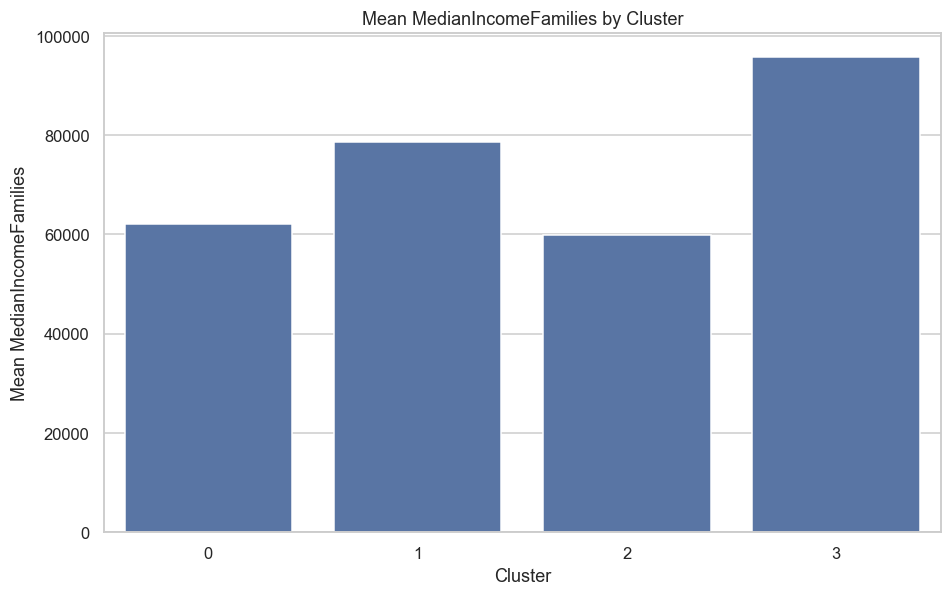

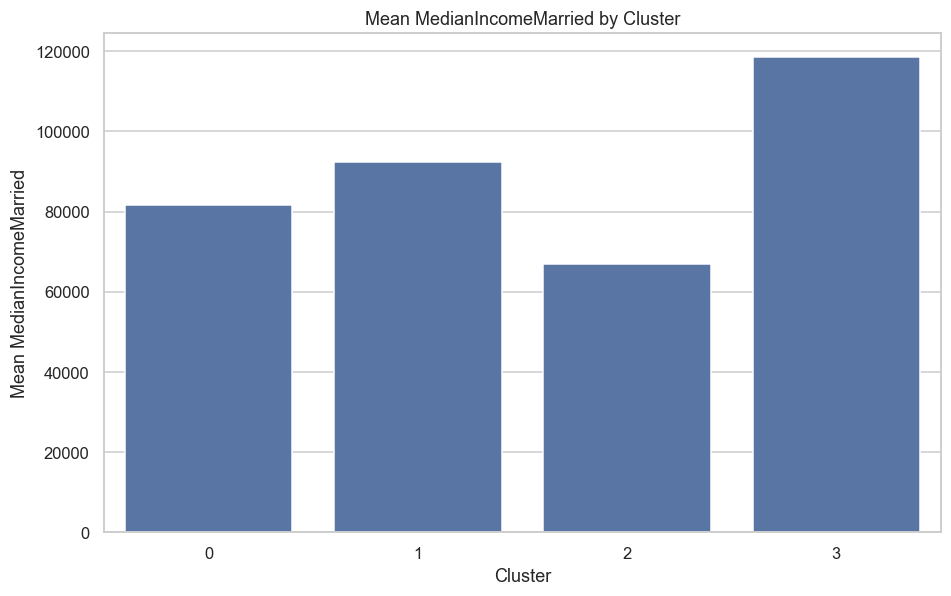

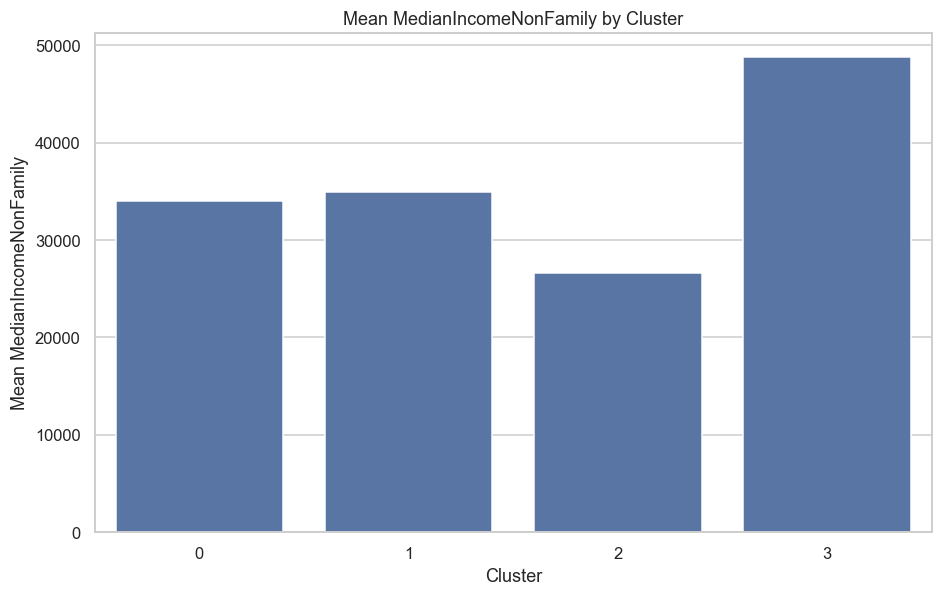

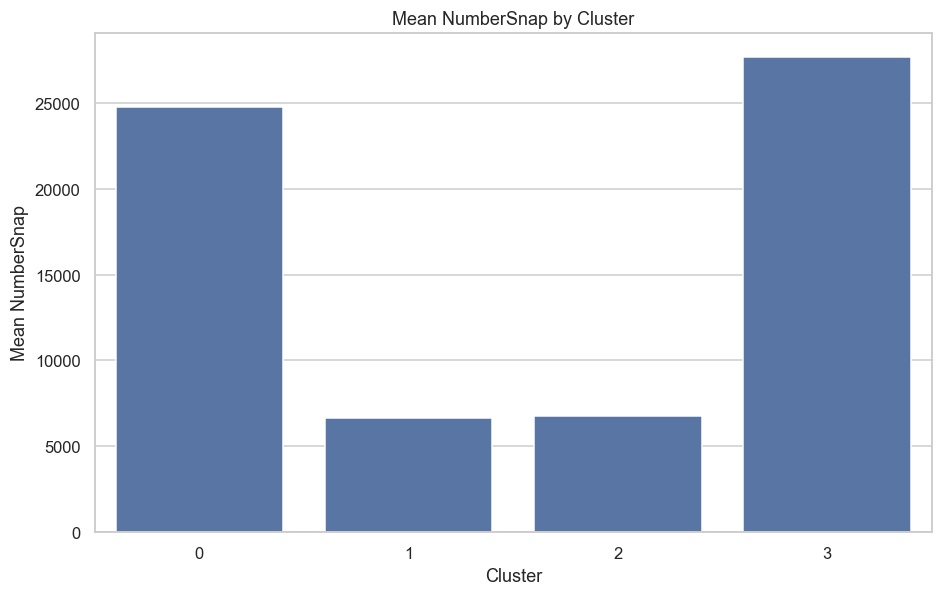

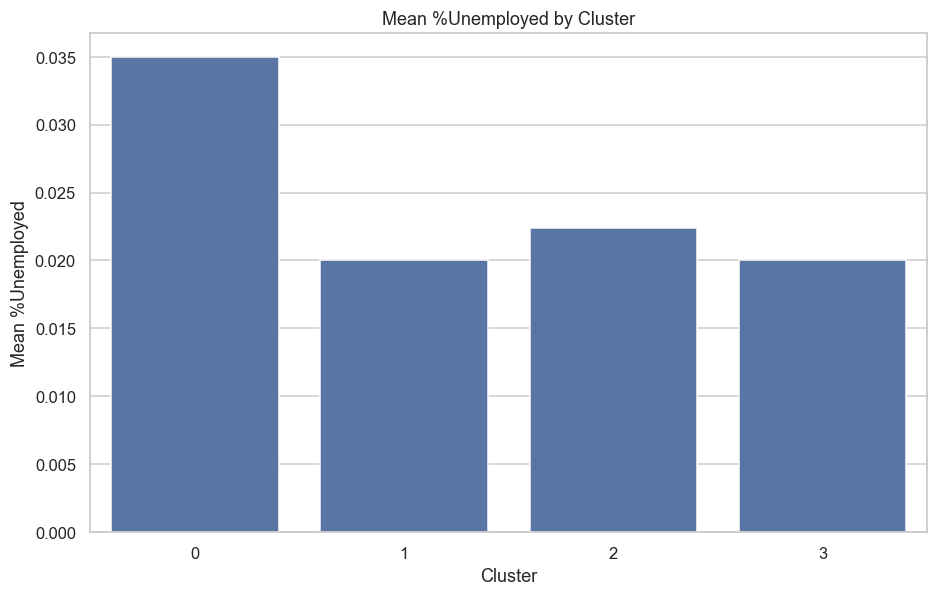

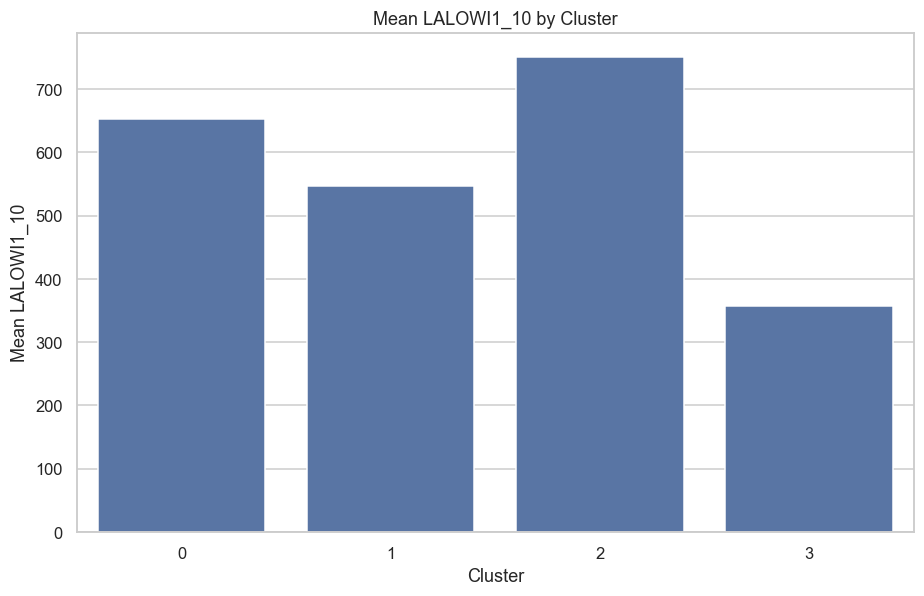

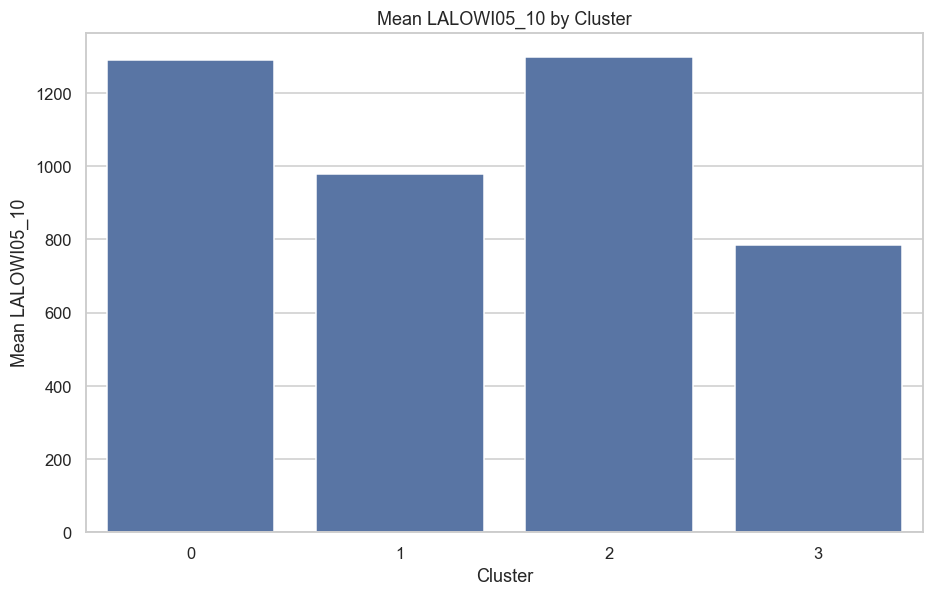

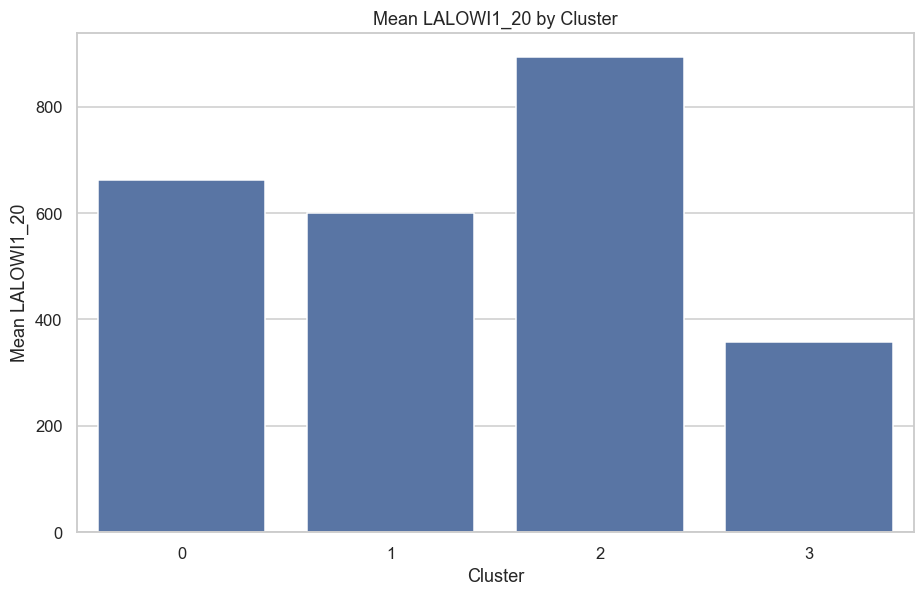

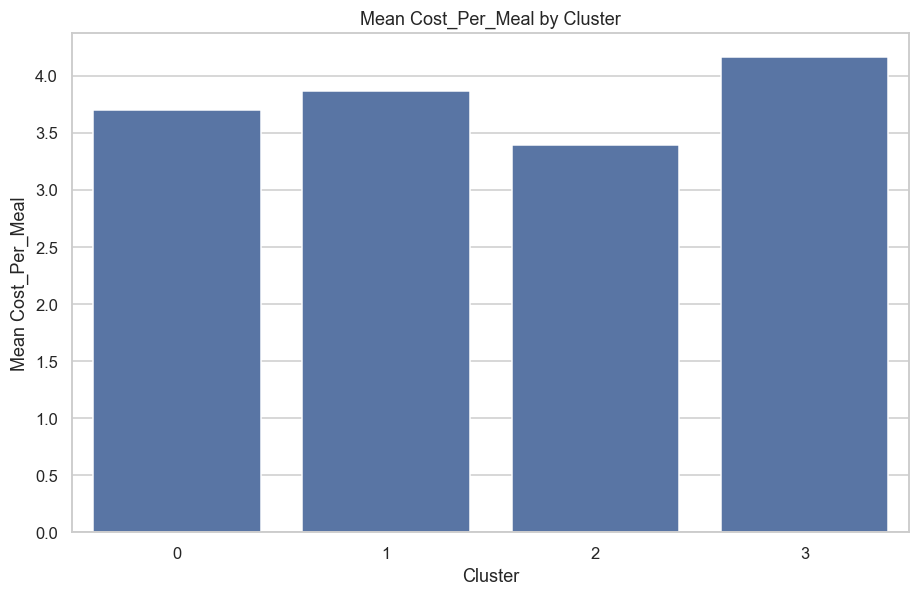

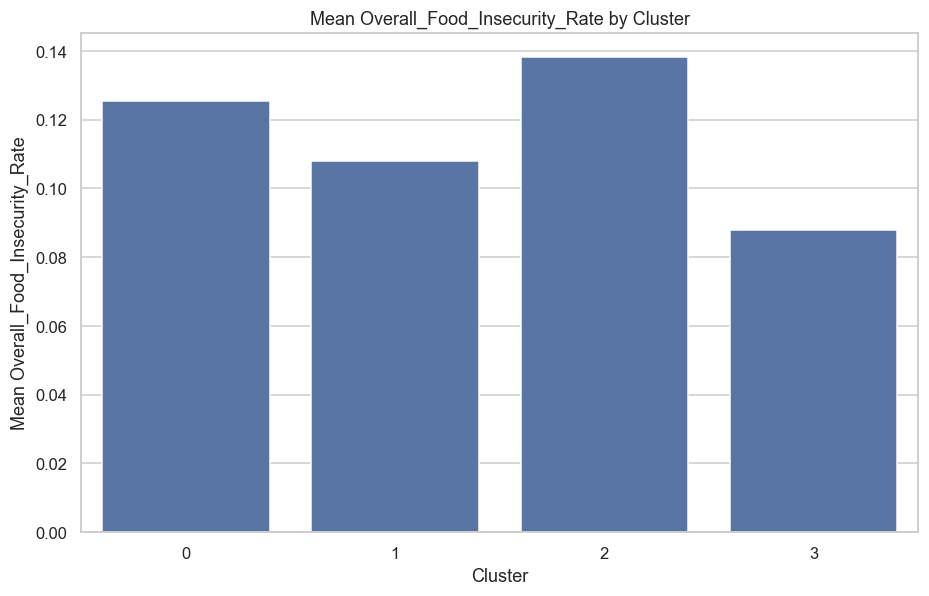

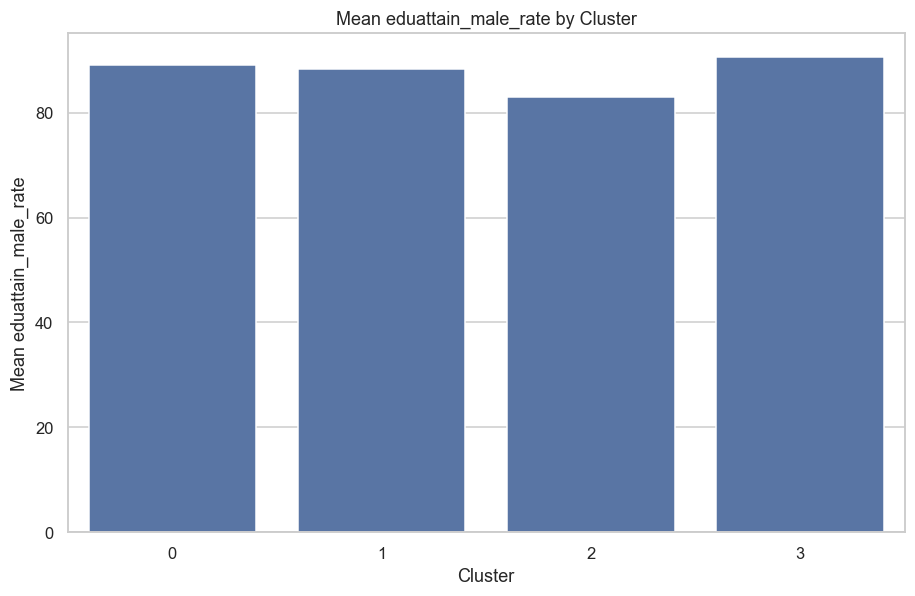

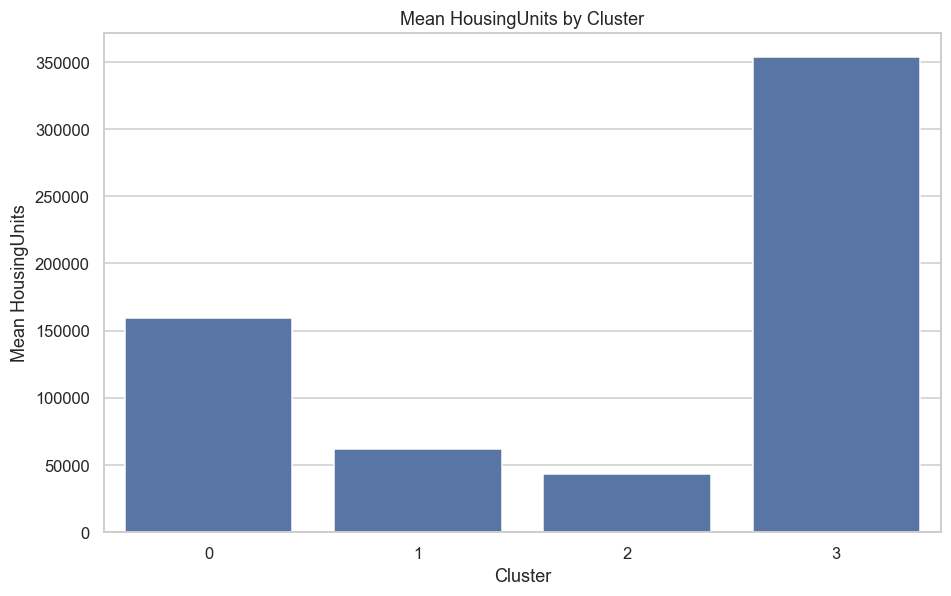

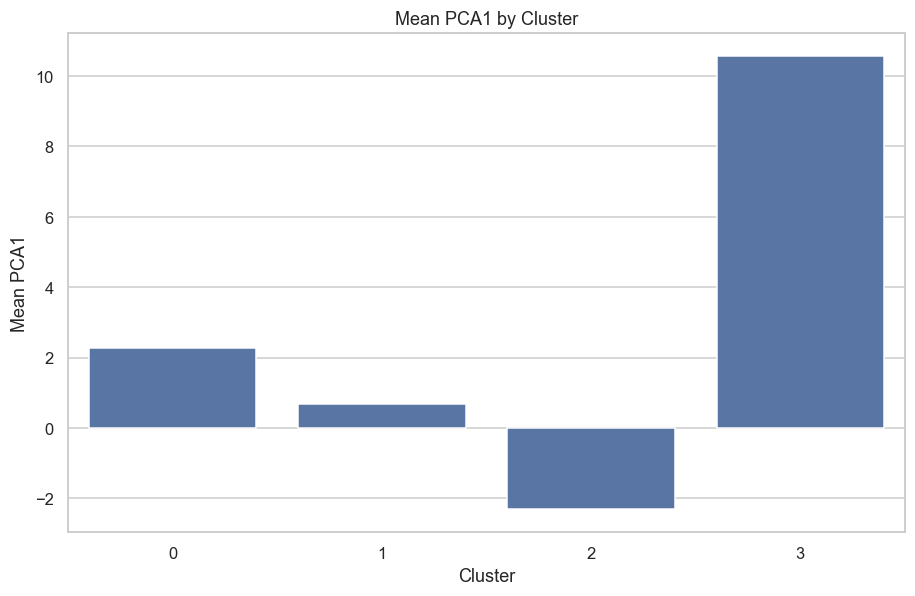

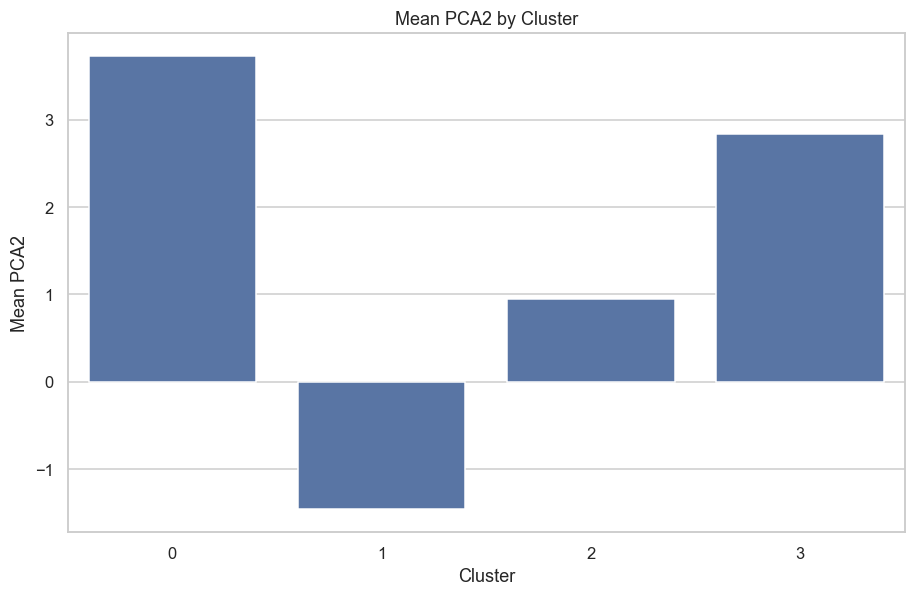

In [47]:
# Calculate the mean for all numerical features within each cluster
cluster_means = df_clus.groupby('Cluster').mean(numeric_only=True) 

# Optionally, calculate other descriptive statistics for these features within each cluster
cluster_medians = df_clus.groupby('Cluster').median(numeric_only=True)
cluster_stddevs = df_clus.groupby('Cluster').std(numeric_only=True)

# Display the calculated profiles for each cluster
print("Cluster Means:")
print(cluster_means)
print("\nCluster Medians:")
print(cluster_medians)
print("\nCluster Standard Deviations:")
print(cluster_stddevs)

# Visualize the mean values of each feature for each cluster using bar plots
# Loop through the columns in cluster_means, which only includes numeric columns
for feature in cluster_means.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cluster_means.index, y=cluster_means[feature])
    plt.title(f'Mean {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(f'Mean {feature}')
    plt.show()


In [48]:
# Get the PCA components (weights for each feature)
pca_components = pd.DataFrame(pca.components_, columns=df_sc.columns, index=['PCA1', 'PCA2'])

# Display the PCA components
print(pca_components)

# For each principal component, find the features with the largest absolute weights
# We'll display the top 3 for simplicity

# Get the top 3 features for PCA1
top_features_pca1 = pca_components.loc['PCA1'].abs().sort_values(ascending=False).head(3).index.tolist()
# Get the top 3 features for PCA2
top_features_pca2 = pca_components.loc['PCA2'].abs().sort_values(ascending=False).head(3).index.tolist()

print("Top features for PCA1:", top_features_pca1)
print("Top features for PCA2:", top_features_pca2)

      Whitepop  Asianpop  two_or_more_pop  Otherpop  NativePacificIslanderpop  \
PCA1  0.294602  0.291689         0.265058  0.265664                  0.057296   
PCA2  0.159191  0.153517         0.258092  0.204046                  0.250071   

      AmericanIndianAlaskanpop  African_American_Blackpop  \
PCA1                 -0.035503                   0.273093   
PCA2                  0.160583                   0.241951   

      MedianIncomeHouseholds  MedianIncomeFamilies  MedianIncomeMarried  \
PCA1                0.236698              0.235835             0.248039   
PCA2               -0.257990             -0.279611            -0.155288   

      MedianIncomeNonFamily  NumberSnap  %Unemployed  LALOWI1_10  LALOWI05_10  \
PCA1               0.276453    0.215930     0.000629   -0.143156    -0.109422   
PCA2              -0.046695    0.332988     0.254972    0.254419     0.255730   

      LALOWI1_20  Cost_Per_Meal  Overall_Food_Insecurity_Rate  \
PCA1   -0.194206       0.248663      

In [49]:
import pandas as pd

# Assuming 'df_clus' is your DataFrame with cluster labels and features
features = ['Whitepop', 'Asianpop', 'two_or_more_pop', 'Otherpop',
            'NativePacificIslanderpop', 'AmericanIndianAlaskanpop',
            'African_American_Blackpop', 'MedianIncomeHouseholds',
            'MedianIncomeFamilies', 'MedianIncomeMarried', 'MedianIncomeNonFamily',
            'NumberSnap', '%Unemployed', 'LALOWI1_10', 'LALOWI05_10', 'LALOWI1_20',
            'Cost_Per_Meal', 'Overall_Food_Insecurity_Rate', 'eduattain_male_rate', 
            'HousingUnits', 'County_State']

outlier_results = pd.DataFrame()

for cluster in df_clus['Cluster'].unique():
    print(f"Analyzing outliers for Cluster {cluster}")
    cluster_data = df_clus[df_clus['Cluster'] == cluster]
    outliers = pd.DataFrame()
    
    for feature in features:
        if cluster_data[feature].dtype in ['int64', 'float64']:  # Ensure the feature is numeric
            Q1 = cluster_data[feature].quantile(0.25)
            Q3 = cluster_data[feature].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Filter outliers within the cluster
            feature_outliers = cluster_data[(cluster_data[feature] < lower_bound) | (cluster_data[feature] > upper_bound)]
            feature_outliers['OutlierFeature'] = feature
            feature_outliers['Cluster'] = cluster
            # Include County Name in the outliers DataFrame
            feature_outliers['CountyName'] = feature_outliers['County_State']
            
            outliers = pd.concat([outliers, feature_outliers], ignore_index=True)
    
    # Print or store the outliers for this particular cluster
    if not outliers.empty:
        print(f"Outliers found for Cluster {cluster}:")
        print(outliers[['CountyName', 'Cluster', 'OutlierFeature'] + features])
        outlier_results = pd.concat([outlier_results, outliers], ignore_index=True)
    else:
        print(f"No significant outliers found for Cluster {cluster}")

# Optionally, save the complete outliers result to a CSV file
# outlier_results.to_csv('cluster_outliers.csv', index=False)


Analyzing outliers for Cluster 1
Outliers found for Cluster 1:
                            CountyName  Cluster                OutlierFeature  \
0        Durham County, North Carolina        1                      Asianpop   
1        Gaston County, North Carolina        1      NativePacificIslanderpop   
2       Forsyth County, North Carolina        1      AmericanIndianAlaskanpop   
3        Durham County, North Carolina        1     African_American_Blackpop   
4       Forsyth County, North Carolina        1     African_American_Blackpop   
5         Union County, North Carolina        1        MedianIncomeHouseholds   
6        Orange County, North Carolina        1          MedianIncomeFamilies   
7         Union County, North Carolina        1          MedianIncomeFamilies   
8        Orange County, North Carolina        1           MedianIncomeMarried   
9        Durham County, North Carolina        1         MedianIncomeNonFamily   
10      Forsyth County, North Carolina        

C:\Users\Kezia\AppData\Local\Temp\ipykernel_14616\3815543044.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_outliers['OutlierFeature'] = feature
C:\Users\Kezia\AppData\Local\Temp\ipykernel_14616\3815543044.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_outliers['Cluster'] = cluster
C:\Users\Kezia\AppData\Local\Temp\ipykernel_14616\3815543044.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

                      County_State  Cluster  Whitepop_outlier  \
7   Catawba County, North Carolina        2             False   
16   Gaston County, North Carolina        1             False   
18  Harnett County, North Carolina        2             False   
28   Orange County, North Carolina        1             False   
31  Robeson County, North Carolina        2             False   
38    Wayne County, North Carolina        2             False   
40   Wilson County, North Carolina        2             False   

    Asianpop_outlier  two_or_more_pop_outlier  Otherpop_outlier  \
7               True                    False             False   
16             False                    False             False   
18             False                    False             False   
28             False                    False             False   
31             False                    False             False   
38             False                    False             False   
40        

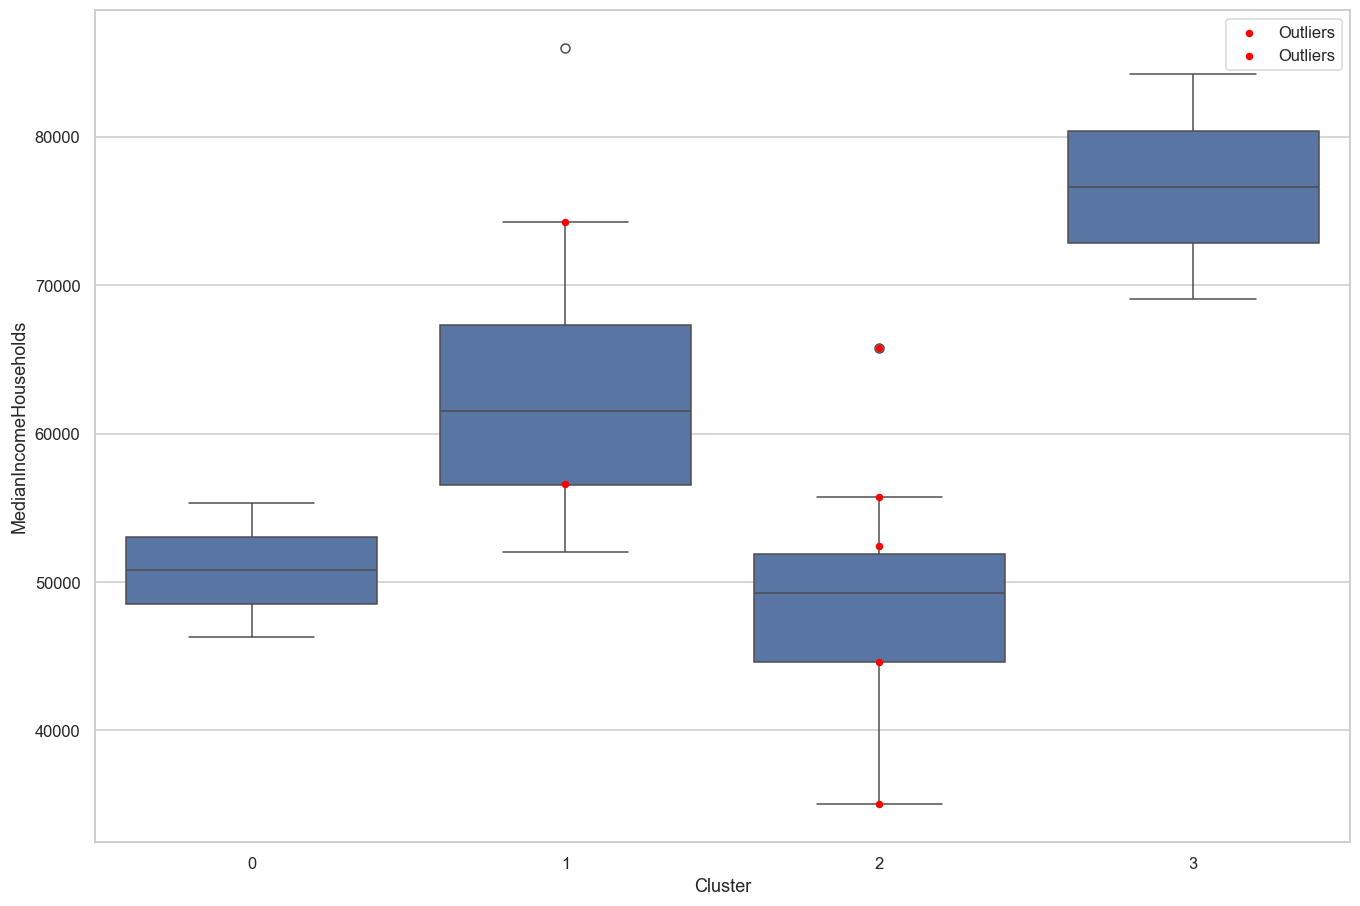

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure df_clus only includes numeric columns for this operation
df_numeric = df_clus.select_dtypes(include=[np.number])

# Calculate means and standard deviations for each cluster for all relevant features
cluster_stats = df_numeric.groupby(df_clus['Cluster']).agg(['mean', 'std'])

# Define a function to detect outliers
def is_outlier(value, mean, std, num_std=3):
    """Check if value is an outlier based on mean and std, num_std defines the threshold in terms of standard deviation"""
    if pd.isna(value) or pd.isna(mean) or pd.isna(std):
        return False
    return (value < mean - num_std * std) or (value > mean + num_std * std)

# Add a new column for outlier detection for each feature
for feature in df_numeric.columns:
    df_clus[f'{feature}_outlier'] = df_clus.apply(lambda row: is_outlier(row[feature], cluster_stats.loc[row['Cluster']][feature]['mean'], cluster_stats.loc[row['Cluster']][feature]['std']), axis=1)

# Filter the DataFrame to show only the outliers
outliers = df_clus[df_clus[[f'{feature}_outlier' for feature in df_numeric.columns]].any(axis=1)]

# Display outliers
print(outliers[['County_State', 'Cluster'] + [f'{feature}_outlier' for feature in df_numeric.columns]])

# Optionally, visualize outliers
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(x='Cluster', y='MedianIncomeHouseholds', data=df_clus, ax=ax)
sns.swarmplot(x='Cluster', y='MedianIncomeHouseholds', data=outliers, color='red', ax=ax, label='Outliers')
plt.legend()
plt.show()

